# Exploratory Data Analysis (EDA) 

In [1]:
# TO DO: fix requirements.txt file 
# Remember that virtual environment is salary_env

## Imports

In [2]:
# Standard library imports 
import os
import sys 

# Third-party imports 
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Local imports 
import utils.preprocessor as mf
import utils.plotting as pf
import utils.analysis as af
import utils.text_parser as tf
import utils.salary_extractor as sf
import utils.dictionaries as dicts

# Activate autoreload for custom modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

# File path definitions
DATA_PATH = os.getenv('DATA_PATH', 'data/') 
MISSING = os.path.join(DATA_PATH, 'df_FRA_missing_data.csv')
         
COUNTRIES = ['Sweden', 'France', 'Italy'] 

In [3]:
# Check we're in the right environment
print(sys.executable)

/Users/emmafrid/Documents/GitHub/portfolio-projects/job-listings-scraper/salary_env/bin/python


## Load data
Import the data scraped using scraper-countries.py (Sept 20-21 2024), for the following countries: USA, Sweden, France, and Italy. These datasets contain the job listings for the 3 largest cities in respective country, for the job titles _Data Scientist_, _Data Analyst_, _Product Analyst_, and _BI Analyst_.

In [4]:
# Import csv files with scraped data for resp. country 
dfs = {country: pd.read_csv(os.path.join(DATA_PATH, f'indeed_jobs_{country}.csv')) for country in COUNTRIES}

# Add USA data to the dictionary
dfs['USA'] = mf.merge_US_cities(['NY', 'LA', 'CHI'], os.path.join(DATA_PATH, 'indeed_jobs_'))

# Access individual country data as needed, e.g., dfs['Sweden']

Loaded data for NY
Column order for consistency: ['page', 'country', 'job_link', 'search_keyword', 'search_location', 'job_title', 'company_name', 'company_location', 'salary', 'job_description']


## Initial data inspection

In [5]:
dfs['Sweden'].head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
4     1  Sweden  https://se.indeed.com/rc/clk?jk=65bfa8c313624f...   

  search_keyword search_location  \
0   Data+Analyst       Stockholm   
1   Data+Analyst       Stockholm   
2   Data+Analyst       Stockholm   
3   Data+Analyst       Stockholm   
4   Data+Analyst       Stockholm   

                                           job_title             company_name  \
0                  Data Analyst (Data Visualization)  Swedium Global Services   
1                                       Data Analyst               Deploja AB   
2                                       Data Analyst      Cubane Solutions AB   
3                                       Data Analyst                     Sobi   
4  Juniora Analysts till Operations, Engineering,...                 Deloitte   

           company_location         salary  \
0  Distansjobb in Stockholm  Not available   
1              169 73 Solna  Not available   
2                 Stockholm         Heltid   
3                 Stockholm         Heltid   
4          113 57 Stockholm         Heltid   

                                     job_description  
0  Data Analyst (Data Visualization) \n \n Swediu...  
1  Role: \n \n Website Performance: Web analyst f...  
2  Responsibilities \n \n Website Performance:  W...  
3  Company Description \n  Statistics show that w...  
4  Företagsbeskrivning  \n \n \n Deloitte är en g...

In [6]:
dfs['France'].head()

page country                                           job_link  \
0     1  France  https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...   
1     1  France  https://www.indeed.fr/rc/clk?jk=71fa252714d41c...   
2     1  France  https://www.indeed.fr/rc/clk?jk=21f25c16a32522...   
3     1  France  https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...   
4     1  France  https://www.indeed.fr/rc/clk?jk=8c5cc311877c09...   

  search_keyword search_location  \
0   Data+Analyst      Paris (75)   
1   Data+Analyst      Paris (75)   
2   Data+Analyst      Paris (75)   
3   Data+Analyst      Paris (75)   
4   Data+Analyst      Paris (75)   

                                           job_title            company_name  \
0                CDI - Data analyst KYC - Senior F/H       La Banque Postale   
1                                   Data Analyst F/H  IZI Solutions Durables   
2                                       Data analyst      Le Groupe La Poste   
3                                   Data Analyst H/F        GROUPE ID SEARCH   
4  Consultant Débutant Data Analyst en CDI - Pari...                      EY   

                        company_location  \
0                             Paris (75)   
1  Télétravail partiel à La Défense (92)   
2               Issy-les-Moulineaux (92)   
3                             Paris (75)   
4                       92037 La Défense   

                                              salary  \
0                                                CDI   
1                                                CDI   
2                                                CDI   
3  À partir de 35 000 € par an  -   CDI, Temps plein   
4                                                CDI   

                                     job_description  
0  INTRODUCTION \n  Au sein de la direction Data ...  
1  À propos  \n \n En 2019, le Groupe EDF veut re...  
2  La Poste Groupe change, nos métiers évoluent. ...  
3  Tertialis, société du groupe ID SEARCH, est sp...  
4  Participer à la digitalisation de nos clients ...

In [7]:
dfs['Italy'].head()

page country                                           job_link  \
0     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
1     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
3     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
4     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   

  search_keyword search_location  \
0   Data+Analyst     Roma, Lazio   
1   Data+Analyst     Roma, Lazio   
2   Data+Analyst     Roma, Lazio   
3   Data+Analyst     Roma, Lazio   
4   Data+Analyst     Roma, Lazio   

                                           job_title          company_name  \
0  Business Intelligence (Power BI) - Python- Bus...         Area IT Group   
1                                   Power Bi Analyst        Verisure Italy   
2                   IT Project Management Internship      Procter & Gamble   
3                   Credit & Collection Data Analyst  Verisure Italy S R L   
4                        Aeronautical System Analyst                adecco   

  company_location                        salary  \
0      Roma, Lazio  25.000 € - 40.000 € all'anno   
1       00144 Roma                 Not available   
2      Roma, Lazio                 Not available   
3       00144 Roma                 Not available   
4      Roma, Lazio                 Not available   

                                     job_description  
0  Ricerchiamo Sviluppatori in almeno uno dei seg...  
1  Ti piacerebbe far parte della multinazionale d...  
2  Job Location Rome   Job Description  INFORMATI...  
3  Ti piacerebbe far parte della multinazionale d...  
4  Per azienda leader a livello globale nella ges...

In [8]:
dfs['USA'].head()

page country                                           job_link  \
0     1     USA  https://www.indeed.com/rc/clk?jk=5bf7eb172149d...   
1     1     USA  https://www.indeed.com/rc/clk?jk=6b99bd10f1316...   
2     1     USA  https://www.indeed.com/rc/clk?jk=d70c515431fa2...   
3     1     USA  https://www.indeed.com/rc/clk?jk=3aa26222eadd6...   
4     1     USA  https://www.indeed.com/rc/clk?jk=3aa564ce173c8...   

  search_keyword search_location  \
0   Data+Analyst    New+York, NY   
1   Data+Analyst    New+York, NY   
2   Data+Analyst    New+York, NY   
3   Data+Analyst    New+York, NY   
4   Data+Analyst    New+York, NY   

                                           job_title        company_name  \
0                   Business Analyst (Data products)                 Aon   
1                                       Data Analyst         NYU Langone   
2                                       Data Analyst  NYU Langone Health   
3    Resy Marketing Data Analyst, Data and Analytics                Amex   
4  2025 University Graduate - Digital Strategy An...               Adobe   

              company_location                                         salary  \
0       Remote in New York, NY        $80,000 - $95,000 a year  -   Full-time   
1                 New York, NY         $32.38 - $39.01 an hour  -   Temporary   
2           New York, NY 10016  $67,771.14 - $75,000.00 a year  -   Full-time   
3  Hybrid work in New York, NY                      $60,000 - $110,000 a year   
4           New York, NY 10012       $53,900 - $101,450 a year  -   Full-time   

                                     job_description  
0  Senior Associate Consultant, Data Solutions   ...  
1  NYU Grossman School of Medicine  is one of the...  
2  NYU Grossman School of Medicine  is one of the...  
3  You Lead the Way. We’ve Got Your Back. \n With...  
4  Our Company   Changing the world through digit...

### Check dimensions and data types

In [9]:
# Check dimensions of dfs 
shapes = pd.DataFrame({
   'Country': dfs.keys(),
   'Columns': [df.shape[1] for df in dfs.values()],
   'Rows': [df.shape[0] for df in dfs.values()]
})
print(shapes.to_string())

  Country  Columns  Rows
0  Sweden       10   320
1  France       10  2200
2   Italy       10   769
3     USA       10  1317


In [10]:
# Check data types
dfs['Sweden'].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page              320 non-null    int64 
 1   country           320 non-null    object
 2   job_link          320 non-null    object
 3   search_keyword    320 non-null    object
 4   search_location   320 non-null    object
 5   job_title         320 non-null    object
 6   company_name      320 non-null    object
 7   company_location  320 non-null    object
 8   salary            320 non-null    object
 9   job_description   320 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [11]:
# Retrieve dictionary with preferred types 
# Convert object columns to strings to optimize performance
# Mixed columns with both numbers and strings should be kept as object, e.g.: company_location, salary, job_link
dicts.dtype_dict

{'page': 'int64',
 'country': 'string',
 'job_link': 'object',
 'search_keyword': 'category',
 'search_location': 'string',
 'job_title': 'string',
 'company_name': 'string',
 'company_location': 'object',
 'salary': 'object',
 'job_description': 'string'}

In [12]:
# Convert columns to preferred data type
dfs = {country: df.astype(dicts.dtype_dict) for country, df in dfs.items()}
# Verify
print(dfs['Sweden'].dtypes)

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object


In [13]:
dfs['Sweden'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   page              320 non-null    int64   
 1   country           320 non-null    string  
 2   job_link          320 non-null    object  
 3   search_keyword    320 non-null    category
 4   search_location   320 non-null    string  
 5   job_title         320 non-null    string  
 6   company_name      320 non-null    string  
 7   company_location  320 non-null    object  
 8   salary            320 non-null    object  
 9   job_description   320 non-null    string  
dtypes: category(1), int64(1), object(3), string(5)
memory usage: 23.1+ KB


## Data Quality Assessment

Overall: 
- The following columns needs to be cleaned: _search_keyword, job_title, job_description, company_location_.   
- The _salary_ column should be split into separate columns, with min and max salary value.   
- Text data in column _job_description_ needs normalization. 

### Missing values

In [14]:
# The scraper labels cells as 'Not available' when there is no value. Change these to NaN. 
for country, df in dfs.items():
    dfs[country] = df.replace('Not available', np.nan)

nan_counts = {country: df.isnull().sum() for country, df in dfs.items()}

for country, counts in nan_counts.items():
   print(f'Missing values for {country}:\n{counts}\n')

Missing values for Sweden:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              183
job_description       0
dtype: int64

Missing values for France:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64

Missing values for Italy:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              746
job_description       0
dtype: int64

Missing values for USA:
page                 0
country              0
job_link             0
search_keyword       0
search_location      0
job_title          

Salary data will be cleaned and examined in detail later. It makes sense that so many values are missing since few job listings actually included salary info. For now we do not drop these rows.

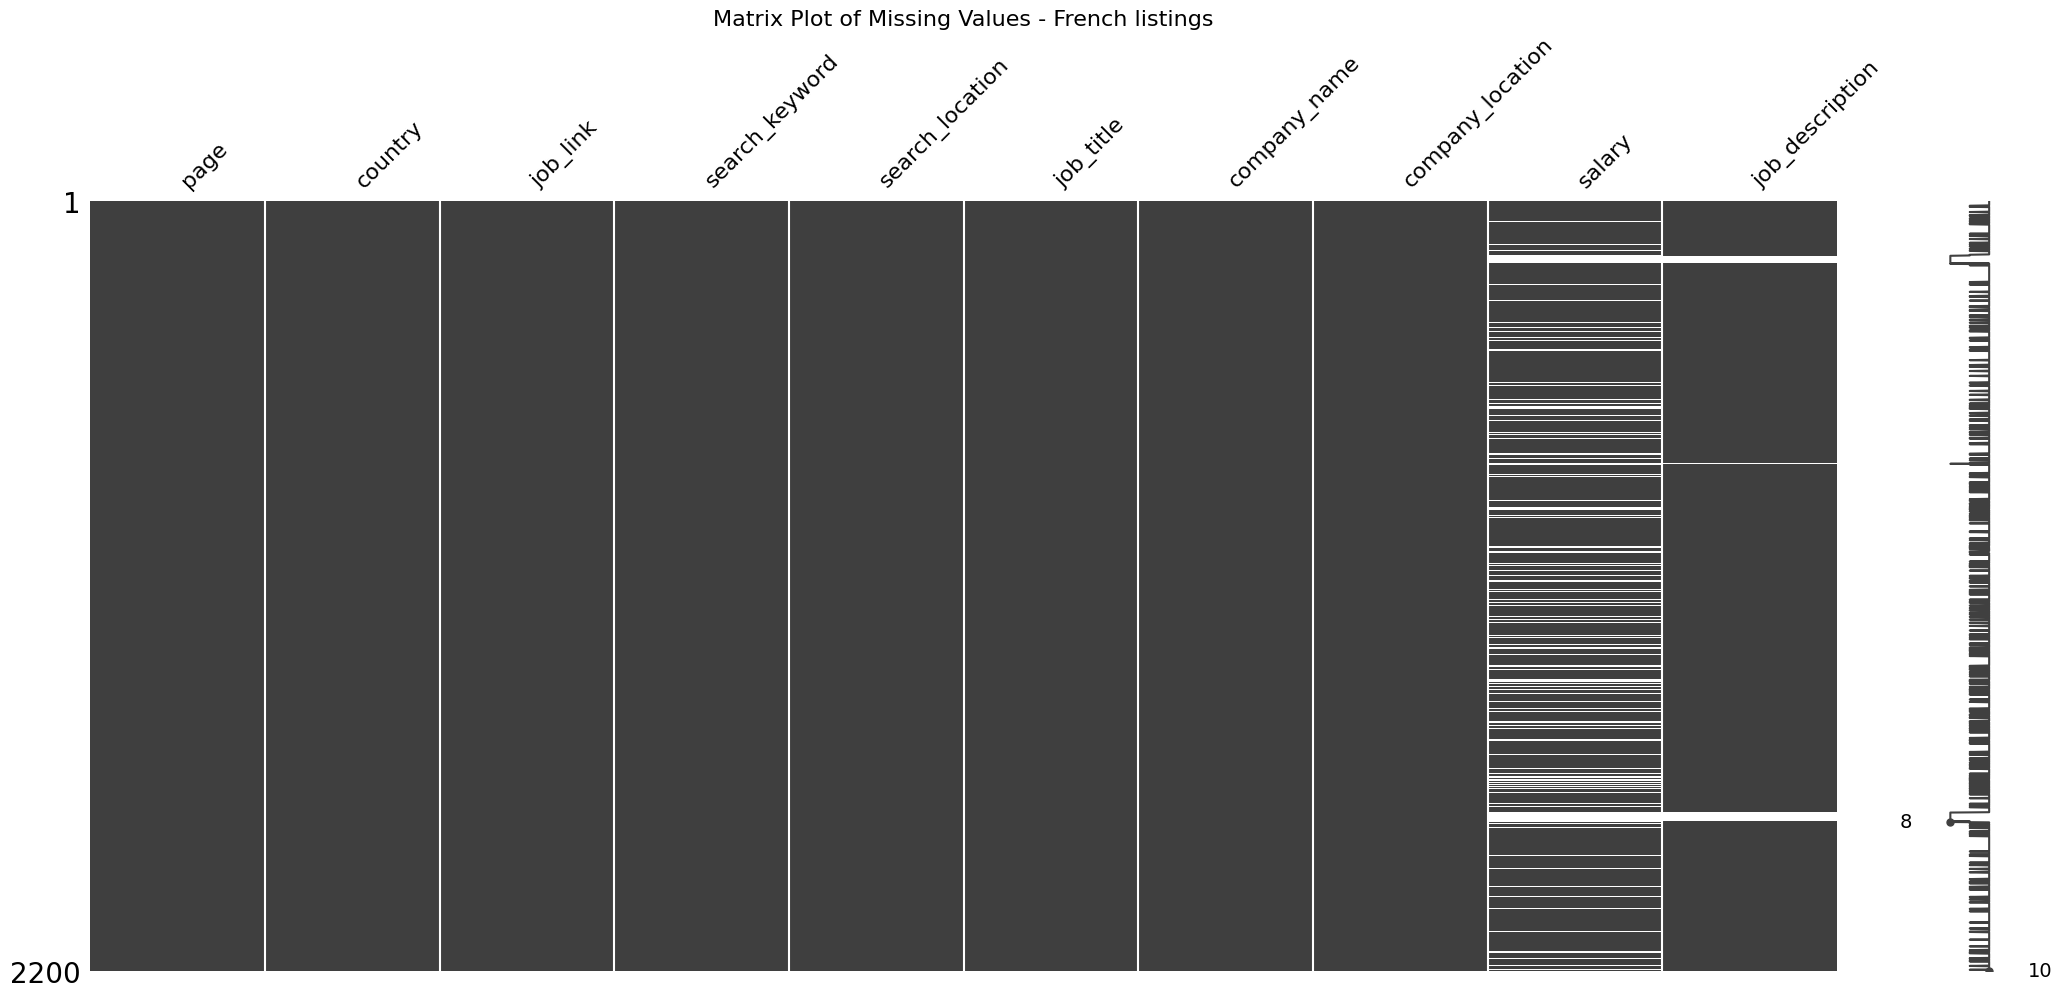

In [15]:
# Visualize missing data patterns 
msno.matrix(dfs['France']) #.sample(250)
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16) 
plt.show()

In [16]:
# Look into the missing descriptions for French job listings (scraper requests seems to have been blocked here?)
print(dfs['France'].isnull().sum())
#dfs['France'][dfs['France']['job_description'].isnull()].head()

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64


In [17]:
# Manual import of missing job description data retrieved directly from URLs 
df_FRA_missing = pd.read_csv(MISSING)
df_FRA_missing.head(3)

page country                                           job_link  \
0    11  France  https://www.indeed.fr/rc/clk?jk=cce878d76d9b30...   
1    11  France  https://www.indeed.fr/rc/clk?jk=56a9127952012f...   
2    11  France  https://www.indeed.fr/rc/clk?jk=f43bcf87ea7bcd...   

  search_keyword search_location                                  job_title  \
0   Data+Analyst      Paris (75)     Business Analyst Customer Data 360 H/F   
1   Data+Analyst      Paris (75)                Senior Data Analyst - Paris   
2   Data+Analyst      Paris (75)  Marketing Business Analyst - (CDD 6 mois)   

     company_name       company_location salary  \
0  AIR FRANCE KLM  Roissy-en-France (95)    CDI   
1         Aircall             Paris (75)    NaN   
2       Deliveroo             Paris (75)    NaN   

                                 job_description_new  
0  Air France KLM recrute :\n\nVous rejoignez l'é...  
1  Paris\nG&A – 13008 - Data /\nFull Time /\nHybr...  
2  Why Deliveroo\n\nOur mission is to transform t...

In [18]:
# Merge French data frames based on the 'job_link' column (serves as unique identifier)
merged_df = pd.merge(dfs['France'], df_FRA_missing[['job_link', 'job_description_new']], on='job_link', how='left')
merged_df['job_description'] = merged_df['job_description'].fillna(merged_df['job_description_new'])
merged_df.drop(columns='job_description_new', inplace=True)
dfs['France'] = merged_df
# Verify that there are no missing values in 'job_description'
print(dfs['France'].isnull().sum())

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description       0
dtype: int64


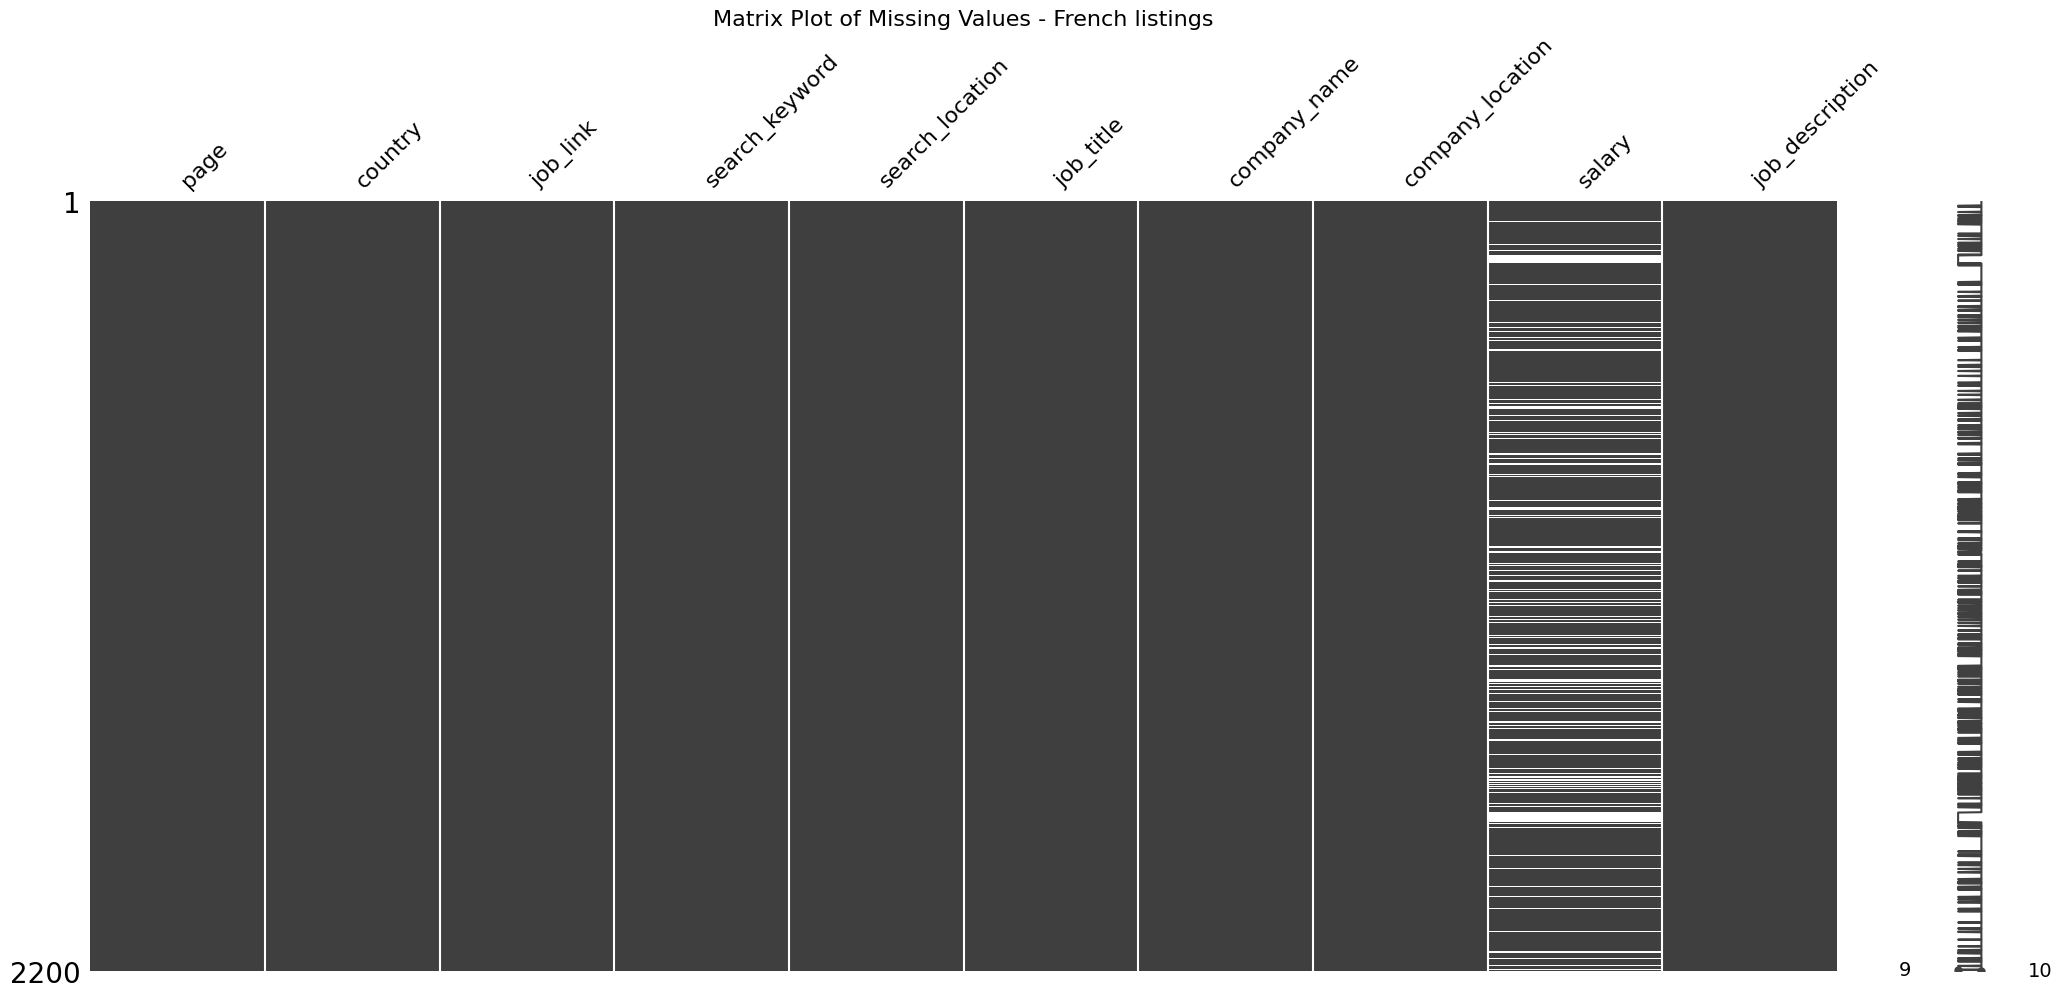

In [19]:
# Now the job_description should not have missing values anymore
msno.matrix(dfs['France'])
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16)  
plt.show()

In [20]:
# Verify consistent data types after the newly added info in job_description column
dfs['France'] = dfs['France'].astype(dicts.dtype_dict)
dfs['France'].dtypes

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object

### Check for duplicates

In [21]:
{mf.check_duplicates(df) for _, df in dfs.items()}

DataFrame with 320 rows has 0 duplicates.
DataFrame with 2200 rows has 0 duplicates.
DataFrame with 769 rows has 0 duplicates.
DataFrame with 1317 rows has 0 duplicates.


{None}

No rows are completely identical, but there are numerous examples of completely identical job descriptions. These are likely _reposts_ (the same job appearing multiple times, just with different unique links). We will remove rows where the job descriptions are identical if there is alsoan identical location and company name (or same urls), but first we have to normalize the job description (see below). 

### Clean columns

In [22]:
# Clean search_keyword and search_location columns: replace '+' with ' ' 
dfs = {country: df.assign(
   search_keyword=pd.Categorical(df['search_keyword'].astype(str).str.replace('+', ' ')),
   search_location=pd.Categorical(df['search_location'].astype(str).str.replace('+', ' '))
) for country, df in dfs.items()}
# Verify that it worked 
dfs['Sweden'].head(3)

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   

  search_keyword search_location                          job_title  \
0   Data Analyst       Stockholm  Data Analyst (Data Visualization)   
1   Data Analyst       Stockholm                       Data Analyst   
2   Data Analyst       Stockholm                       Data Analyst   

              company_name          company_location  salary  \
0  Swedium Global Services  Distansjobb in Stockholm     NaN   
1               Deploja AB              169 73 Solna     NaN   
2      Cubane Solutions AB                 Stockholm  Heltid   

                                     job_description  
0  Data Analyst (Data Visualization) 
 
 Swedium ...  
1  Role: 
 
 Website Performance: Web analyst foc...  
2  Responsibilities 
 
 Website Performance:  Web...

In [23]:
# Clean job_title column 
dfs = {country: df.assign(
   job_title=df['job_title'].str.lower().pipe(
       lambda x: x.str.replace(r'\(?(h/f|f/h)\)?', '', regex=True).str.strip() 
       if country == 'France' else x
   )
) for country, df in dfs.items()}

In [24]:
# Merge all dfs in the dictionary into a single df
df_combined = pd.concat(dfs.values(), ignore_index=True)
df_combined.reset_index(drop=True, inplace=True)
# Add dates when data was scraped 
df_combined['date'] = np.where(df_combined['country'].isin(['Sweden', 'USA']), pd.to_datetime('2024-09-19'), pd.to_datetime('2024-09-20'))
df_combined.head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
4     1  Sweden  https://se.indeed.com/rc/clk?jk=65bfa8c313624f...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title             company_name  \
0                  data analyst (data visualization)  Swedium Global Services   
1                                       data analyst               Deploja AB   
2                                       data analyst      Cubane Solutions AB   
3                                       data analyst                     Sobi   
4  juniora analysts till operations, engineering,...                 Deloitte   

           company_location  salary  \
0  Distansjobb in Stockholm     NaN   
1              169 73 Solna     NaN   
2                 Stockholm  Heltid   
3                 Stockholm  Heltid   
4          113 57 Stockholm  Heltid   

                                     job_description       date  
0  Data Analyst (Data Visualization) 
 
 Swedium ... 2024-09-19  
1  Role: 
 
 Website Performance: Web analyst foc... 2024-09-19  
2  Responsibilities 
 
 Website Performance:  Web... 2024-09-19  
3  Company Description 
  Statistics show that wo... 2024-09-19  
4  Företagsbeskrivning  
 
 
 Deloitte är en glob... 2024-09-19

In [25]:
# Language identification for job descriptions (can take a little while)
df_combined['language'] = df_combined['job_description'].map(tf.detect_language)

In [26]:
# Assign job_id to each row, instead of using URLs as unique identifiers
df_combined.insert(0, 'job_id', range(1, len(df_combined) + 1))
df_combined.head(3)

job_id  page country                                           job_link  \
0       1     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1       2     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2       3     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   

  search_keyword search_location                          job_title  \
0   Data Analyst       Stockholm  data analyst (data visualization)   
1   Data Analyst       Stockholm                       data analyst   
2   Data Analyst       Stockholm                       data analyst   

              company_name          company_location  salary  \
0  Swedium Global Services  Distansjobb in Stockholm     NaN   
1               Deploja AB              169 73 Solna     NaN   
2      Cubane Solutions AB                 Stockholm  Heltid   

                                     job_description       date language  
0  Data Analyst (Data Visualization) 
 
 Swedium ... 2024-09-19       en  
1  Role: 
 
 Website Performance: Web analyst foc... 2024-09-19       en  
2  Responsibilities 
 
 Website Performance:  Web... 2024-09-19       en

In [27]:
# Normalize text data in job_description
normalized_descriptions = df_combined.groupby('language')[['job_description']].apply(tf.normalize_group)
normalized_descriptions = normalized_descriptions.reset_index()
df_combined = df_combined.reset_index(drop=True)
df_combined = pd.merge(df_combined, normalized_descriptions[['language', 'job_description', 'job_description_norm']], on=['language', 'job_description'], how='left')

Normalizing text for language group: en
Normalizing text for language group: fr
Normalizing text for language group: it
Normalizing text for language group: sv


In [28]:
df_combined[['job_description', 'job_description_norm']].head()

job_description  \
0  Data Analyst (Data Visualization) 
 
 Swedium ...   
1  Data Analyst (Data Visualization) 
 
 Swedium ...   
2  Role: 
 
 Website Performance: Web analyst foc...   
3  Role: 
 
 Website Performance: Web analyst foc...   
4  Responsibilities 
 
 Website Performance:  Web...   

                                job_description_norm  
0  data analyst data visualization swedium global...  
1  data analyst data visualization swedium global...  
2  role website performance web analyst focus spe...  
3  role website performance web analyst focus spe...  
4  responsibility website performance web analyst...

In [29]:
# Now remove duplicates based on normalized job description. 
# Identify rows with same job description, company, and location (or unique url) and keep only the latest job listing
df_combined = mf.remove_duplicates_jobdesc(df_combined)

Initial rows: 10096
Rows after removing exact duplicates: 3027
Final rows: 3027
Total duplicates removed: 7069


In [30]:
# Check new row numbers after removing duplicates
row_counts = df_combined.groupby('country').size()
print("\nRow counts:\n", row_counts)


Row counts:
 country
France    1363
Italy      566
Sweden     263
USA        835
dtype: int64


In [31]:
# Map language codes to full language names 
df_combined['language'] = df_combined['language'].map(dicts.language_map)

In [32]:
# Clean and parse location column 
countries = ['Sweden', 'France', 'Italy', 'USA']

mapping_dict = {
   'France': (dicts.dept_mapping_fr, dicts.region_mapping_fr),
   'Sweden': (dicts.dept_mapping_se, dicts.region_mapping_se),
   'Italy': (dicts.dept_mapping_it, dicts.region_mapping_it), 
   'USA': (dicts.dept_mapping_us, dicts.region_mapping_us)
}

location_dfs = [mf.standardize_locations(df_combined[df_combined['country']==country], 
                                      'company_location',
                                      mapping_dict[country][0],
                                      mapping_dict[country][1],
                                      country) 
               for country in countries]

location_df = pd.concat(location_dfs)
df_combined = df_combined.merge(location_df, on=['job_id', 'company_location'], how='left')
df_combined = df_combined.drop('country_x', axis=1).rename(columns={'country_y': 'country'})

In [33]:
df_combined.head()

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3      14     1  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4      16     2  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19  swedish   
4  WSP  is a global consulting firm assisting pub... 2024-09-19  english   

                                job_description_norm  city_name  \
0  company description statistic show woman under...  Stockholm   
1  entercard entercard one scandinavia’s leading ...  Stockholm   
2  star stable entertainment upon time 2011 found...  Stockholm   
3  baby journey lanserades hösten 2020 app riktar...  Stockholm   
4  wsp global consulting firm assisting public pr...  Stockholm   

           department     region country  
0  01 - Stockholm län  Stockholm  Sweden  
1  01 - Stockholm län  Stockholm  Sweden  
2  01 - Stockholm län  Stockholm  Sweden  
3  01 - Stockholm län  Stockholm  Sweden  
4  01 - Stockholm län  Stockholm  Sweden

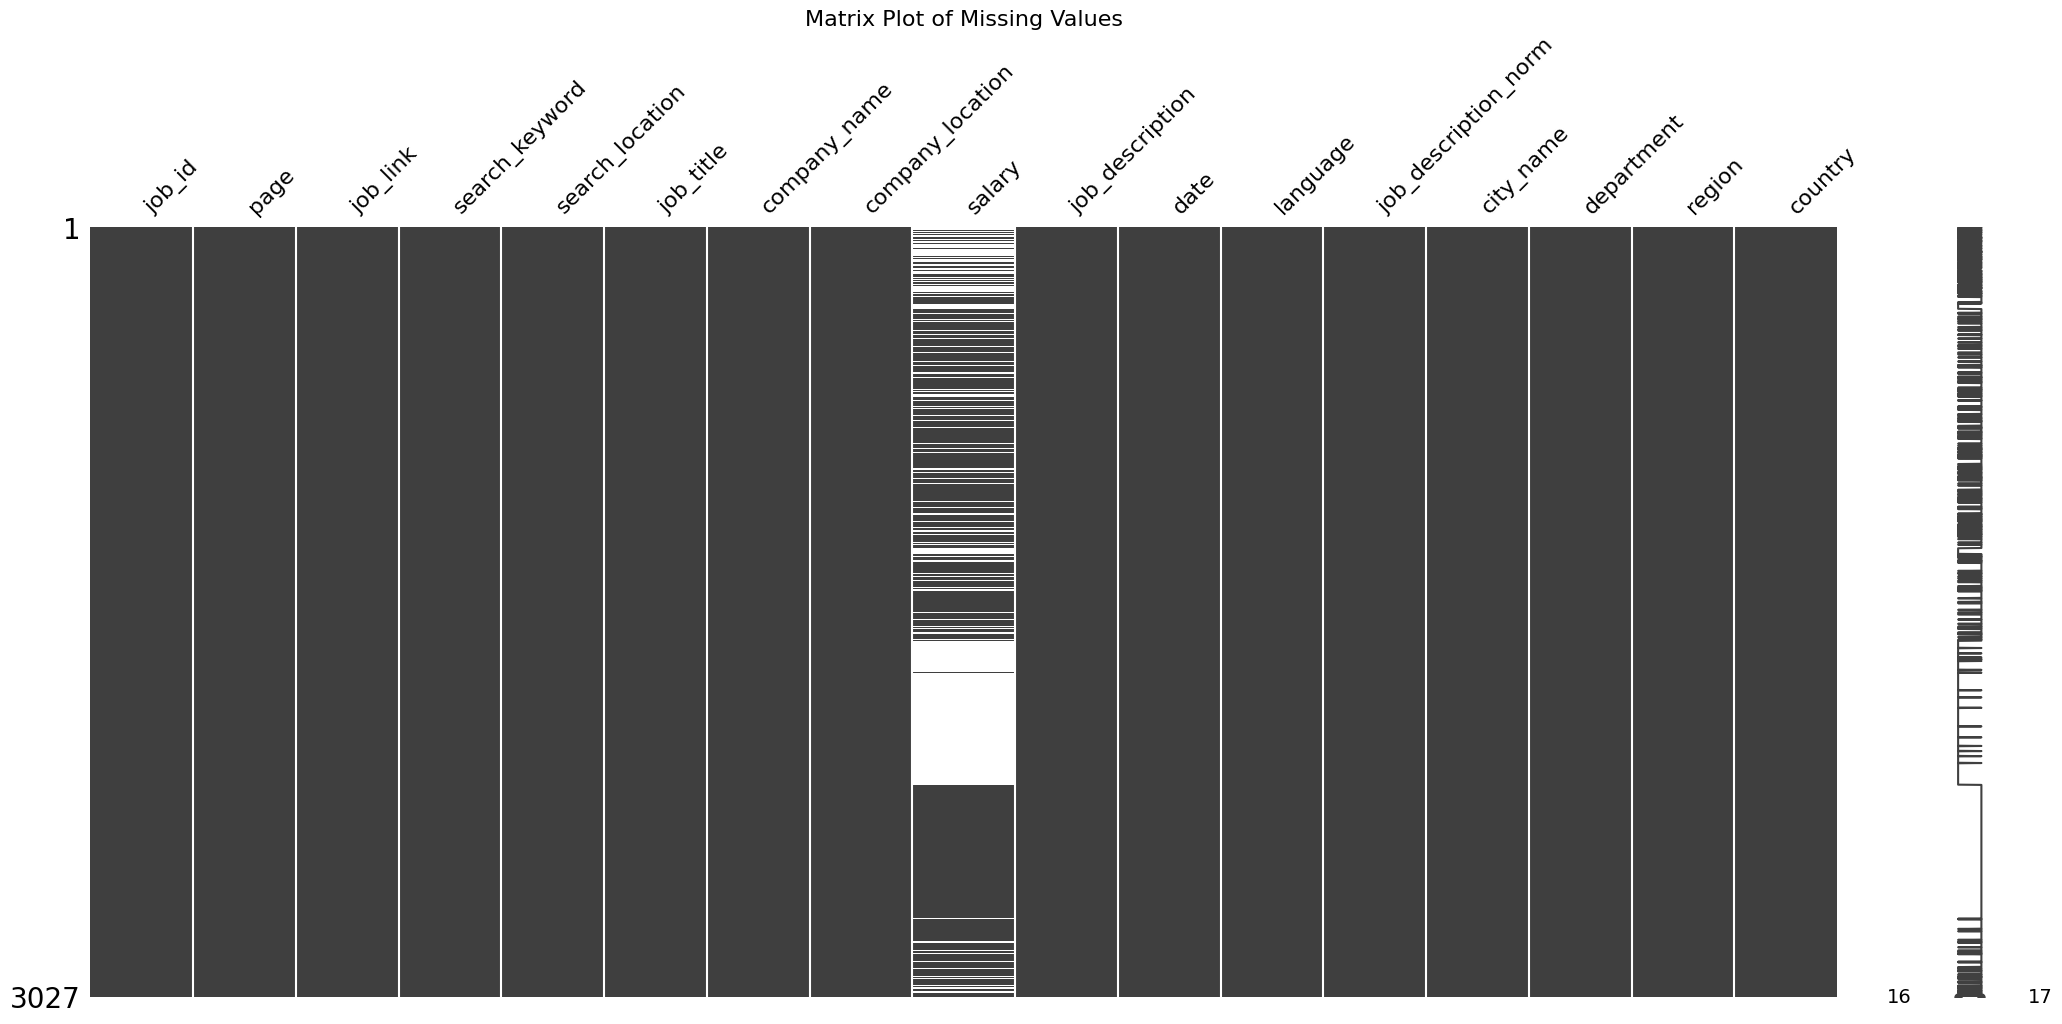

In [34]:
# Just verify that this didn't introduce new null values
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values', fontsize=16)  
plt.show()

In [48]:
# New version: 
df_combined2 = df_combined

In [49]:

location_dfs2 = [mf.standardize_locations_2(df_combined2[df_combined2['country']==country], 
                                     'company_location',
                                     mapping_dict[country][0],
                                     mapping_dict[country][1],
                                     country) 
              for country in countries]

location_df2 = pd.concat(location_dfs)
df_combined2 = df_combined2.merge(location_df2, on=['job_id', 'company_location'], how='left')
df_combined2 = df_combined2.drop('country_x', axis=1).rename(columns={'country_y': 'country'})
df_combined2.head()

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3      14     1  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4      16     2  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19  swedish   
4  WSP  is a global consulting firm assisting pub... 2024-09-19  english   

                                job_description_norm city_name_x  \
0  company description statistic show woman under...   Stockholm   
1  entercard entercard one scandinavia’s leading ...   Stockholm   
2  star stable entertainment upon time 2011 found...   Stockholm   
3  baby journey lanserades hösten 2020 app riktar...   Stockholm   
4  wsp global consulting firm assisting public pr...   Stockholm   

         department_x   region_x city_name_y        department_y   region_y  \
0  01 - Stockholm län  Stockholm   Stockholm  01 - Stockholm län  Stockholm   
1  01 - Stockholm län  Stockholm   Stockholm  01 - Stockholm län  Stockholm   
2  01 - Stockholm län  Stockholm   Stockholm  01 - Stockholm län  Stockholm   
3  01 - Stockholm län  Stockholm   Stockholm  01 - Stockholm län  Stockholm   
4  01 - Stockholm län  Stockholm   Stockholm  01 - Stockholm län  Stockholm   

  country  
0  Sweden  
1  Sweden  
2  Sweden  
3  Sweden  
4  Sweden

In [40]:
# Create concatenated dataframes and align them
df1 = pd.concat(location_dfs).sort_values(['job_id', 'company_location']).reset_index(drop=True)
df2 = pd.concat(location_dfs2).sort_values(['job_id', 'company_location']).reset_index(drop=True)

# Compare
are_equal = df1.equals(df2)
print(f"Dataframes are equal: {are_equal}")
print(f"\nShapes - Original: {df1.shape}, New: {df2.shape}")

if not are_equal:
    # Show differences
    diff_mask = (df1 != df2).any(axis=1)
    print("\nRows with differences:")
    print(pd.concat([df1[diff_mask], df2[diff_mask]], keys=['df1', 'df2']))

Dataframes are equal: False

Shapes - Original: (3027, 6), New: (3027, 6)

Rows with differences:
Empty DataFrame
Columns: [job_id, company_location, city_name, department, region, country]
Index: []


In [43]:
print("Null values in df1:", df1.isnull().sum().sum())
print("Null values in df2:", df2.isnull().sum().sum())
print("\nData types df1:\n", df1.dtypes)
print("\nData types df2:\n", df2.dtypes)

Null values in df1: 0
Null values in df2: 0

Data types df1:
 job_id                       int64
company_location            object
city_name                   object
department                  object
region                      object
country             string[python]
dtype: object

Data types df2:
 job_id               int64
company_location    object
city_name           object
department          object
region              object
country             object
dtype: object


In [44]:
# Convert both to object type
df1['country'] = df1['country'].astype('object')
df2['country'] = df2['country'].astype('object')

# Check equality again
are_equal = df1.equals(df2)
print(f"Dataframes are equal after type conversion: {are_equal}")

Dataframes are equal after type conversion: True


In [36]:
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                        object
job_description_norm            object
city_name                       object
department                      object
region                          object
country                 string[python]
dtype: object

In [37]:
# Verify data types for new columns (compare to dicts.dtype_dict)
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                        object
job_description_norm            object
city_name                       object
department                      object
region                          object
country                 string[python]
dtype: object

In [38]:
df_combined = df_combined.astype({
    'job_id': 'int64',
    'language': 'category',
    'job_description_norm': 'string',
    'city_name' : 'string',  
    'country' : 'category' 
})
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
dtype: object

In [39]:
df_combined.head(3)

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   

                                job_description_norm  city_name  \
0  company description statistic show woman under...  Stockholm   
1  entercard entercard one scandinavia’s leading ...  Stockholm   
2  star stable entertainment upon time 2011 found...  Stockholm   

           department     region country  
0  01 - Stockholm län  Stockholm  Sweden  
1  01 - Stockholm län  Stockholm  Sweden  
2  01 - Stockholm län  Stockholm  Sweden

## Descriptive statistics

In [41]:
# Describe (numerical) columns  
mask = df_combined['country'] == 'Sweden'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    263.0  263.0                                                263   
unique     NaN    NaN                                                263   
top        NaN    NaN  https://se.indeed.com/rc/clk?jk=132e951bba6ac1...   
freq       NaN    NaN                                                  1   

        search_keyword search_location         job_title         company_name  \
count              263             263               263                  263   
unique               4               3               194                  198   
top     Data Scientist       Stockholm  systemutvecklare  Cubane Solutions AB   
freq               131             186                19                    7   

       company_location  salary  \
count               263     113   
unique               88      10   
top           Stockholm  Heltid   
freq                 69      58   

                                          job_description date language  \
count                                                 263  263      263   
unique                                                263  NaN        2   
top     We are hiring a GIS Analyst   Nordregio is exp...  NaN  english   
freq                                                    1  NaN      133   

                                     job_description_norm  city_name  \
count                                                 263        263   
unique                                                263         15   
top     hiring gi analyst nordregio expanding gi team ...  Stockholm   
freq                                                    1        157   

                department     region country  
count                  263        263     263  
unique                   3          3       1  
top     01 - Stockholm län  Stockholm  Sweden  
freq                   186        186     263

In [42]:
# Describe categorical columns  
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
systemutvecklare                                 19
data analyst                                     13
data scientist                                   13
business analyst                                  8
senior data scientist                             5
                                                 ..
pricing coordinator                               1
senior business intelligence analyst              1
senior logistics analyst                          1
powerbi utvecklare                                1
production analytics lead [game intelligence]     1
Name: count, Length: 194, dtype: Int64

Value counts for column: company_name
company_name
Cubane Solutions AB      7
Deploja AB               6
JobBusters AB            4
Volvo Group              4
TEN10 AB                 4
                        ..
Techster Solutions       1
JAS Worldwide            1
Wolters Kluwer           1
Techster Solutions AB    1
Ubisoft               

### Preliminary observations, Swedish job listings:
- __Most frequent job title__: Systemutvecklare.
- __Most frequent company__: Cubane Solutions AB. 
- __Company location__: Stockholm primarily. 
- __Salary ranges__: Few numerical values.

In [43]:
mask = df_combined['country'] == 'France'
df_combined[mask].describe(include='all').head(4)

job_id    page                                           job_link  \
count   1362.0  1362.0                                               1362   
unique     NaN     NaN                                               1362   
top        NaN     NaN  https://www.indeed.fr/rc/clk?jk=87348216f5b0a7...   
freq       NaN     NaN                                                  1   

         search_keyword search_location     job_title company_name  \
count              1362            1362          1362         1362   
unique                4               3          1151          718   
top     Product Analyst      Paris (75)  data analyst          AXA   
freq                501            1197            38           37   

       company_location       salary  \
count              1362         1106   
unique              256          164   
top          Paris (75)  Temps plein   
freq                380          298   

                                          job_description  date language  \
count                                                1362  1362     1362   
unique                                               1350   NaN        2   
top     Qui sommes-nous? \n \n Artefact est une nouvel...   NaN   french   
freq                                                    2   NaN      982   

                                     job_description_norm city_name  \
count                                                1362      1362   
unique                                               1340        95   
top     sommes-nous  artefact société française spécia...     Paris   
freq                                                    2       688   

        department         region country  
count         1362           1362    1362  
unique          10              3       1  
top     75 - Paris  Île-de-France  France  
freq           691           1198    1362

In [44]:
af.desc_categorical(df_combined[mask]) 

Value counts for column: job_title
job_title
data analyst                                                                                            38
data scientist                                                                                          32
business analyst                                                                                        13
data analyst intern                                                                                      8
business analyst data                                                                                    7
                                                                                                        ..
apprenticeship - business data analyst - september 2024 - (m/f)                                          1
alternance - assistant data analyst                                                                      1
business analyst customer data 360 & crm                                                           

### Preliminary observations, French job listings:
- Many listings compared to Sweden. 
- __Most frequent job title__: Data Analyst. 
- __Most frequently mentioned company__: AXA. 
- __Company location__: Most in Paris. 
- __Salary ranges__: Need to split column to be able to draw any conclusions.

In [45]:
mask = df_combined['country'] == 'Italy'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    567.0  567.0                                                567   
unique     NaN    NaN                                                567   
top        NaN    NaN  https://it.indeed.com/rc/clk?jk=46de7544ab716b...   
freq       NaN    NaN                                                  1   

       search_keyword    search_location       job_title  \
count             567                567             567   
unique              4                  3             451   
top      Data Analyst  Milano, Lombardia  data scientist   
freq              259                388              33   

                               company_name   company_location  \
count                                   567                567   
unique                                  309                 96   
top     BIP - Business Integration Partners  Milano, Lombardia   
freq                                     30                148   

                 salary                                    job_description  \
count                17                                                567   
unique               14                                                552   
top     1.000 € al mese  NTT DATA, Trusted Global Innovator, è tra i pr...   
freq                  3                                                  3   

       date language                               job_description_norm  \
count   567      567                                                567   
unique  NaN        3                                                553   
top     NaN  italian  ntt data trusted global innovator è tra princi...   
freq    NaN      314                                                  3   

       city_name   department     region country  
count        567          567        567     567  
unique        27            6          3       1  
top       Milano  MI - Milano  Lombardia   Italy  
freq         341          380        388     567

In [46]:
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
data scientist                                                        33
data analyst                                                          16
business analyst                                                      11
senior data analyst                                                    6
data engineer                                                          4
                                                                      ..
sviluppatore con competenze in strumenti di reportistica microsoft     1
junior data analyst | synergie                                         1
junior data analyst | lutech                                           1
demand planner - confectionery                                         1
global it senior business analyst (legal)                              1
Name: count, Length: 451, dtype: Int64

Value counts for column: company_name
company_name
BIP - Business Integration Partners    30
NTT Data           

### Preliminary observations, Italian job listings:
- Many listings compared to Sweden, but less than France.
- __Most frequent job title__: Data Scientist.
- __Most frequently mentioned company__: BIP - Business Integration Partners. 
- __Company location__: Milano. 
- __Salary ranges__: Few numerical entries. 

In [47]:
mask = df_combined['country']=='USA'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    835.0  835.0                                                835   
unique     NaN    NaN                                                835   
top        NaN    NaN  https://www.indeed.com/rc/clk?jk=274ddb9b95715...   
freq       NaN    NaN                                                  1   

        search_keyword search_location     job_title company_name  \
count              835             835           835          835   
unique               4               3           737          470   
top     Data Scientist    New York, NY  data analyst         Citi   
freq               264             487            12           27   

       company_location     salary  \
count               835        789   
unique              185        524   
top        New York, NY  Full-time   
freq                179        149   

                                          job_description date language  \
count                                                 835  835      835   
unique                                                823  NaN        1   
top     Wavemaker positively provokes growth for clien...  NaN  english   
freq                                                    2  NaN      835   

                                     job_description_norm city_name  \
count                                                 835       835   
unique                                                823        42   
top     wavemaker positively provokes growth client re...  New York   
freq                                                    2       419   

                 department     region country  
count                   835        835     835  
unique                    5          3       1  
top     NY - New York State  Northeast     USA  
freq                    450        487     835

In [48]:
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
data analyst                                                   12
business analyst                                               11
senior machine learning engineer                                9
senior data scientist                                           8
senior business analyst                                         5
                                                               ..
sales analyst                                                   1
healthcare claims api/edi business analyst (local) (hybrid)     1
ecommerce analyst                                               1
senior financial analyst, north america commercial finance      1
business analyst, performance internal controls                 1
Name: count, Length: 737, dtype: Int64

Value counts for column: company_name
company_name
Citi                        27
JPMorganChase               22
Google                      13
Amazon.com Services LLC     11
PRICE WATERHOU

### Preliminary observations, American job listings:
- Number of listings are less than for France. 
- __Most frequent job title__: Data Analyst. But titles need to be looked at in detail to get the full picture (there are terms such as 'senior' that will result in separate categories when counting values)
- __Most frequently mentioned company__: Citi. 
- __Company location__: New York.  
- __Salary ranges__: Need to look into the numerical entries only.

## Feature engineering 

### Retrieve numeric values for salary

In [49]:
df_combined.head()

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3      14     1  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4      16     2  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19  swedish   
4  WSP  is a global consulting firm assisting pub... 2024-09-19  english   

                                job_description_norm  city_name  \
0  company description statistic show woman under...  Stockholm   
1  entercard entercard one scandinavia’s leading ...  Stockholm   
2  star stable entertainment upon time 2011 found...  Stockholm   
3  baby journey lanserades hösten 2020 app riktar...  Stockholm   
4  wsp global consulting firm assisting public pr...  Stockholm   

           department     region country  
0  01 - Stockholm län  Stockholm  Sweden  
1  01 - Stockholm län  Stockholm  Sweden  
2  01 - Stockholm län  Stockholm  Sweden  
3  01 - Stockholm län  Stockholm  Sweden  
4  01 - Stockholm län  Stockholm  Sweden

In [50]:
for country in df_combined['country'].unique():
    mask = df_combined['country'] == country
    unique_langs = df_combined[mask]['language'].unique().tolist()
    print('*' * 30, f'Retrieving salaries for {country}:', f'Languages: {unique_langs}', sep='\n')
    result = sf.parse_salary_column(df_combined[mask], languages=unique_langs, country=country, time_keyword_dict=dicts.time_keywords)
    print(f'Rows changed for {country}: {result.shape[0]}. Original rows retrieved: {df_combined[mask].shape[0]}')
    assert result.shape[0]==df_combined[mask].shape[0]
    if result.shape[0] != df_combined[mask].shape[0]:
        print(f"Warning: Size mismatch for {country}. Expected {df_combined[mask].size}, got {result.size}")
        break 
    columns_to_update = ['min_salary', 'max_salary', 'currency', 'time_unit']
    df_combined.loc[mask, columns_to_update] = result[columns_to_update]
    print('*' * 30 + '\n')

******************************
Retrieving salaries for Sweden:
Languages: ['english', 'swedish']
     min_salary  max_salary currency
110     40000.0     80000.0      sek
221     15000.0     20000.0      sek
Rows changed for Sweden: 263. Original rows retrieved: 263
******************************

******************************
Retrieving salaries for France:
Languages: ['french', 'english']
      min_salary  max_salary currency
265        721.0      1747.0     euro
285     38452.41     50000.0     euro
290        800.0      1500.0     euro
294      45000.0     55000.0     euro
296      33000.0     33000.0     euro
...          ...         ...      ...
1603     35000.0     35000.0     euro
1605     35000.0     45000.0     euro
1614     42000.0     48000.0     euro
1616     45000.0     55000.0     euro
1617     40000.0     55000.0     euro

[155 rows x 3 columns]
Rows changed for France: 1362. Original rows retrieved: 1362
******************************

******************************
R

In [51]:
df_combined.head()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   job_id                3027 non-null   int64         
 1   page                  3027 non-null   int64         
 2   job_link              3027 non-null   object        
 3   search_keyword        3027 non-null   category      
 4   search_location       3027 non-null   object        
 5   job_title             3027 non-null   string        
 6   company_name          3027 non-null   string        
 7   company_location      3027 non-null   object        
 8   salary                2025 non-null   object        
 9   job_description       3027 non-null   string        
 10  date                  3027 non-null   datetime64[ns]
 11  language              3027 non-null   category      
 12  job_description_norm  3027 non-null   string        
 13  city_name         

In [52]:
print('Sample of updated data:')
print(df_combined[df_combined['salary'].notna()][['country', 'salary', 'min_salary', 'max_salary', 'currency', 'time_unit']].sample(5))

Sample of updated data:
     country                   salary  min_salary  max_salary currency  \
1238  France              Temps plein        <NA>        <NA>     <NA>   
1314  France                      CDI        <NA>        <NA>     <NA>   
1428  France                    Stage        <NA>        <NA>     <NA>   
454   France  Temps plein, Alternance        <NA>        <NA>     <NA>   
1307  France              Temps plein        <NA>        <NA>     <NA>   

     time_unit  
1238      <NA>  
1314      <NA>  
1428      <NA>  
454       <NA>  
1307      <NA>  


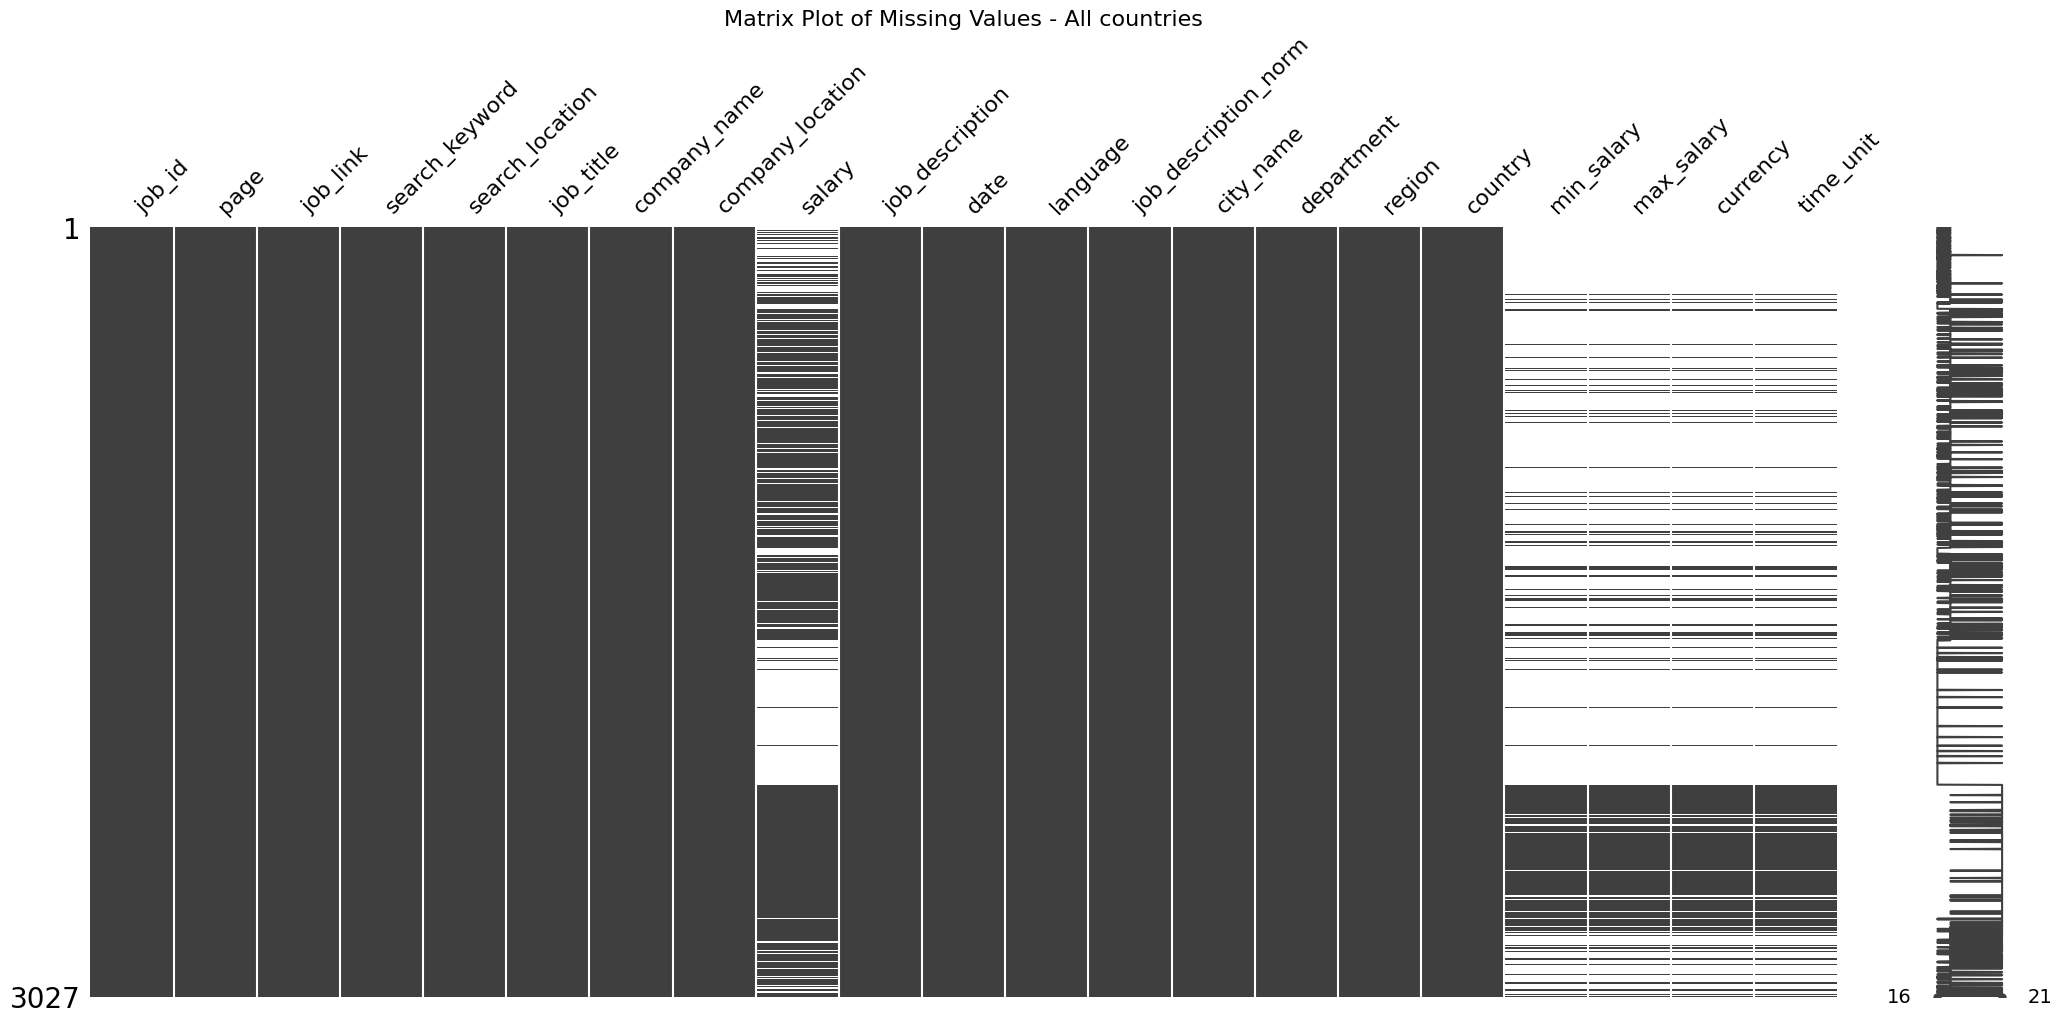

In [53]:
# Check missing values now 
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values - All countries', fontsize=16)  
plt.show()

In [54]:
# Make sure data types are correct again
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
min_salary                     Float64
max_salary                     Float64
currency                string[python]
time_unit               string[python]
dtype: object

In [55]:
# Get monthly salary for all rows 
df_combined['min_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'min_salary', 'time_unit')
df_combined['max_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'max_salary', 'time_unit')
df_combined[df_combined['min_salary_monthly'].notna()].head(3)

job_id  page                                           job_link  \
110     145     1  https://se.indeed.com/rc/clk?jk=044708271c5bec...   
221     279     1  https://se.indeed.com/rc/clk?jk=3daeeaf597909e...   
265     351     3  https://www.indeed.fr/rc/clk?jk=8a827ea3e37c59...   

      search_keyword search_location  \
110   Data Scientist        Göteborg   
221  Product Analyst           Malmö   
265     Data Analyst      Paris (75)   

                                             job_title  \
110  senior data scientist som vill skapa framtida ...   
221  swedish customer support analyst - bulgaria ba...   
265                alternance - assistant data analyst   

                   company_name                              company_location  \
110       Artificial Collective                               413 27 Göteborg   
221  TELUS International Europe                                          Lund   
265                  CMI France  Télétravail partiel à 92300 Levallois-Perret   

                                                salary  \
110                    40 000SEK - 80 000SEK per månad   
221  15 000SEK - 20 000SEK per månad  -   Tillsvida...   
265        De 721 € à 1 747 € par mois  -   Alternance   

                                       job_description  ...         city_name  \
110  Hej!  
 Är du redo att göra verklig skillnad m...  ...          Göteborg   
221  *Please note that the position is based in Sof...  ...              Lund   
265  CMI Media, la régie publicitaire du groupe CMI...  ...  Levallois-Perret   

                    department           region country min_salary max_salary  \
110  14 - Västra Götalands län  Västra Götaland  Sweden    40000.0    80000.0   
221             12 - Skåne län            Skåne  Sweden    15000.0    20000.0   
265        92 - Hauts-de-Seine    Île-de-France  France      721.0     1747.0   

    currency  time_unit  min_salary_monthly max_salary_monthly  
110      sek      month             40000.0            80000.0  
221      sek      month             15000.0            20000.0  
265     euro      month               721.0             1747.0  

[3 rows x 23 columns]

In [56]:
# Convert salary to same currency using exchange rate
df_combined = sf.process_salaries(df_combined)

Exchange rates: {'SEK': 0.08674, 'USD': 0.94958, 'EUR': 1}

Debug Information:
Currency mapping: {'dollar': 0.94958, 'euro': 1, 'sek': 0.08674}

Currency value counts: currency
<NA>      2228
dollar     625
euro       172
sek          2
Name: count, dtype: Int64

Sample conversions for each currency:

DOLLAR conversions:
     currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
2192   dollar            5647.595              6250.0           5362.84326   
2193   dollar              5000.0         9166.666667               4747.9   

     max_salary_month_EUR  
2192             5934.875  
2193          8704.483333  

EURO conversions:
    currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
265     euro               721.0              1747.0                721.0   
285     euro           3204.3675         4166.666667            3204.3675   

    max_salary_month_EUR  
265               1747.0  
285          4166.666667  

SEK conversions:
    curr

In [57]:
# Verify correct data types 
# Convert currency, time_unit into categorical 
df_combined[['currency', 'time_unit']] = df_combined[['currency', 'time_unit']].astype('category')
df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']] = df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']].astype('Float64')
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
min_salary                     Float64
max_salary                     Float64
currency                      category
time_unit                     category
min_salary_monthly             Float64
max_salary_monthly             Float64
min_salary_month_EUR           Float64
max_salary_month_EUR           Float64
dtype: object

### Detect keywords : overall

In [58]:
# Extract keywords for countries
common_keywords = pd.Series(dicts.countries_languages).apply(
    lambda x: tf.extract_keywords(df_combined, x[0], x[1]))

# Access keywords for specific country
common_keywords['SWE'][0]

[('data', 1062),
 ('team', 694),
 ('business', 599),
 ('experience', 554),
 ('work', 475),
 ('erfarenhet', 370),
 ('product', 322),
 ('skill', 291),
 ('working', 283),
 ('solution', 281)]

### Detect keywords : technical skills

In [59]:
# Create keyword counts for different countries 
technical_skills = pd.concat([
    af.count_keywords(df_combined, country_name, dicts.software_keywords, 'job_description_norm')
    for _, (country_name, _) in dicts.countries_languages.items()
], ignore_index=True).sort_values('Count', ascending=False)
technical_skills.head()

Category   Keyword   Search Keyword Country  Count
368  Programming Languages/Software     excel  Product Analyst  France    279
297           Data Vis and BI Tools  power bi       BI Analyst  France    256
328               Development Tools       git  Product Analyst  France    228
365  Programming Languages/Software     excel       BI Analyst  France    199
819  Programming Languages/Software     excel       BI Analyst     USA    188

In [60]:
# Relative frequency of keyword for resp. country and search keyword
skills_country = af.calculate_country_frequencies(technical_skills, df_combined)

# View top skills for each country
top_skills_by_country = skills_country.sort_values(['Country', 'Frequency'], ascending=[True, False]).groupby('Country').head(10)
top_skills_by_country

Country                        Category      Keyword  Count  Total_jobs  \
70   France  Programming Languages/Software        excel    713        1362   
55   France               Development Tools          git    572        1362   
83   France  Programming Languages/Software          sql    477        1362   
78   France  Programming Languages/Software       python    392        1362   
46   France           Data Vis and BI Tools     power bi    319        1362   
51   France           Data Vis and BI Tools      tableau    306        1362   
71   France  Programming Languages/Software          go     120        1362   
80   France  Programming Languages/Software         rust    113        1362   
67   France  Programming Languages/Software           r     112        1362   
13   France                 Cloud Computing        azure    110        1362   
165   Italy  Programming Languages/Software        excel    268         567   
146   Italy               Development Tools          git    242         567   
171   Italy  Programming Languages/Software       python    207         567   
176   Italy  Programming Languages/Software          sql    191         567   
129   Italy          Data Science Platforms  informatica    132         567   
166   Italy  Programming Languages/Software          go     110         567   
175   Italy  Programming Languages/Software        scala     92         567   
138   Italy           Data Vis and BI Tools     power bi     82         567   
143   Italy           Data Vis and BI Tools      tableau     75         567   
140   Italy           Data Vis and BI Tools          sap     72         567   
224  Sweden               Development Tools          git    118         263   
247  Sweden  Programming Languages/Software          sql    104         263   
243  Sweden  Programming Languages/Software       python     79         263   
236  Sweden  Programming Languages/Software        excel     76         263   
238  Sweden  Programming Languages/Software         java     50         263   
196  Sweden                 Cloud Computing        azure     45         263   
233  Sweden  Programming Languages/Software           r      40         263   
215  Sweden           Data Vis and BI Tools     power bi     38         263   
220  Sweden           Data Vis and BI Tools      tableau     37         263   
195  Sweden                 Cloud Computing          aws     30         263   
326     USA  Programming Languages/Software        excel    537         835   
338     USA  Programming Languages/Software          sql    349         835   
333     USA  Programming Languages/Software       python    304         835   
310     USA               Development Tools          git    248         835   
327     USA  Programming Languages/Software          go     203         835   
337     USA  Programming Languages/Software        scala    196         835   
335     USA  Programming Languages/Software         rust    180         835   
307     USA           Data Vis and BI Tools      tableau    156         835   
324     USA  Programming Languages/Software           r     131         835   
270     USA                 Cloud Computing          aws    110         835   

     Frequency  
70       52.35  
55       42.00  
83       35.02  
78       28.78  
46       23.42  
51       22.47  
71        8.81  
80        8.30  
67        8.22  
13        8.08  
165      47.27  
146      42.68  
171      36.51  
176      33.69  
129      23.28  
166      19.40  
175      16.23  
138      14.46  
143      13.23  
140      12.70  
224      44.87  
247      39.54  
243      30.04  
236      28.90  
238      19.01  
196      17.11  
233      15.21  
215      14.45  
220      14.07  
195      11.41  
326      64.31  
338      41.80  
333      36.41  
310      29.70  
327      24.31  
337      23.47  
335      21.56  
307      18.68  
324      15.69  
270      13.17

In [61]:
# Top 10 keywords overall
global_skills = af.calculate_global_frequencies(technical_skills, df_combined)
global_skills.head(10)

Category   Keyword  Count  Frequency  Total_jobs
84  Programming Languages/Software     excel   1594      52.66        3027
62               Development Tools       git   1180      38.98        3027
97  Programming Languages/Software       sql   1121      37.03        3027
92  Programming Languages/Software    python    982      32.44        3027
57           Data Vis and BI Tools   tableau    574      18.96        3027
52           Data Vis and BI Tools  power bi    539      17.81        3027
85  Programming Languages/Software       go     453      14.97        3027
96  Programming Languages/Software     scala    396      13.08        3027
94  Programming Languages/Software      rust    389      12.85        3027
80  Programming Languages/Software        r     351      11.60        3027

In [62]:
skills_by_role = af.calculate_frequencies_by_search_keyword(technical_skills, df_combined)

# Get top 10 skills for each search keyword
top_skills_by_role = skills_by_role.groupby('Search Keyword', observed=True).head(10)
top_skills_by_role

Search Keyword                        Category   Keyword  Count  \
58        BI Analyst  Programming Languages/Software     excel    461   
38        BI Analyst           Data Vis and BI Tools  power bi    409   
69        BI Analyst  Programming Languages/Software       sql    377   
42        BI Analyst           Data Vis and BI Tools   tableau    270   
45        BI Analyst               Development Tools       git    248   
65        BI Analyst  Programming Languages/Software    python    243   
59        BI Analyst  Programming Languages/Software       go     134   
56        BI Analyst  Programming Languages/Software        r      94   
10        BI Analyst                 Cloud Computing     azure     90   
66        BI Analyst  Programming Languages/Software      rust     87   
142     Data Analyst  Programming Languages/Software     excel    472   
129     Data Analyst               Development Tools       git    295   
153     Data Analyst  Programming Languages/Software       sql    248   
124     Data Analyst           Data Vis and BI Tools   tableau    157   
148     Data Analyst  Programming Languages/Software    python    155   
143     Data Analyst  Programming Languages/Software       go     116   
121     Data Analyst           Data Vis and BI Tools       sap     82   
139     Data Analyst  Programming Languages/Software        r      81   
150     Data Analyst  Programming Languages/Software      rust     81   
152     Data Analyst  Programming Languages/Software     scala     69   
248   Data Scientist  Programming Languages/Software    python    469   
253   Data Scientist  Programming Languages/Software       sql    330   
221   Data Scientist               Development Tools       git    324   
241   Data Scientist  Programming Languages/Software     excel    264   
252   Data Scientist  Programming Languages/Software     scala    161   
180   Data Scientist                 Cloud Computing       aws    154   
237   Data Scientist  Programming Languages/Software        r     148   
181   Data Scientist                 Cloud Computing     azure    141   
243   Data Scientist  Programming Languages/Software      java    136   
177   Data Scientist           Big Data Technologies     spark    124   
325  Product Analyst  Programming Languages/Software     excel    397   
316  Product Analyst               Development Tools       git    313   
338  Product Analyst  Programming Languages/Software       sql    166   
335  Product Analyst  Programming Languages/Software      rust    122   
333  Product Analyst  Programming Languages/Software    python    115   
326  Product Analyst  Programming Languages/Software       go      95   
337  Product Analyst  Programming Languages/Software     scala     82   
347  Product Analyst   Version Control/Collaboration      jira     73   
327  Product Analyst  Programming Languages/Software      java     47   
310  Product Analyst           Data Vis and BI Tools       sap     45   

     Total_jobs  Frequency  
58          762      60.50  
38          762      53.67  
69          762      49.48  
42          762      35.43  
45          762      32.55  
65          762      31.89  
59          762      17.59  
56          762      12.34  
10          762      11.81  
66          762      11.42  
142         800      59.00  
129         800      36.88  
153         800      31.00  
124         800      19.62  
148         800      19.38  
143         800      14.50  
121         800      10.25  
139         800      10.12  
150         800      10.12  
152         800       8.62  
248         744      63.04  
253         744      44.35  
221         744      43.55  
241         744      35.48  
252         744      21.64  
180         744      20.70  
237         744      19.89  
181         744      18.95  
243         744      18.28  
177         744      16.67  
325         721      55.06  
316         721      43.41  
338         721      23.02  
335         721      16.92

### Detect keywords : interview process

In [63]:
dicts.context_patterns

{'english': 'recruitment process|interview process',
 'french': "processus de recrutement|processus d\\'entretien",
 'italian': 'processo di reclutamento|processo di colloquio',
 'swedish': 'rekryteringsprocess|intervjuprocess'}

In [64]:
# Extract interview information
interview_info_df, interview_flags_df = tf.extract_interview_details(df_combined, 
                                                                  dicts.interview_stages, 
                                                                  dicts.context_patterns, 
                                                                  'job_description_norm', 
                                                                  'language')

# Sum Boolean columns in interview_flags_df to count occurrences of each interview stage
stage_counts = interview_flags_df.select_dtypes(include='bool').sum()
stage_counts

phone_screening         49
technical_screening      8
case_study              16
coding_assessment        6
behavioral_interview     4
on_site_interview        3
presentation             0
dtype: int64

In [65]:
# Example: run this to retrieve text about technical interviews
#interview_info_df[interview_info_df['technical_screening_text'].notna()]

Information about the interview process seems to mostly be missing/left out from the job listnings. However, the most common category appears to be phone/video call screenings, followed by case studies. 

## Analysis and visualizations


### Categorical features

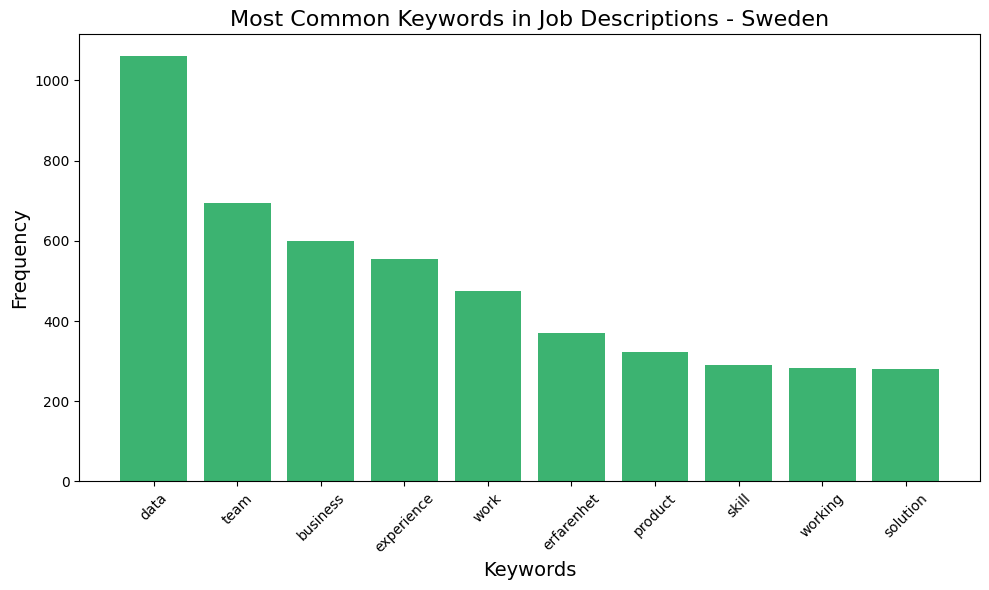

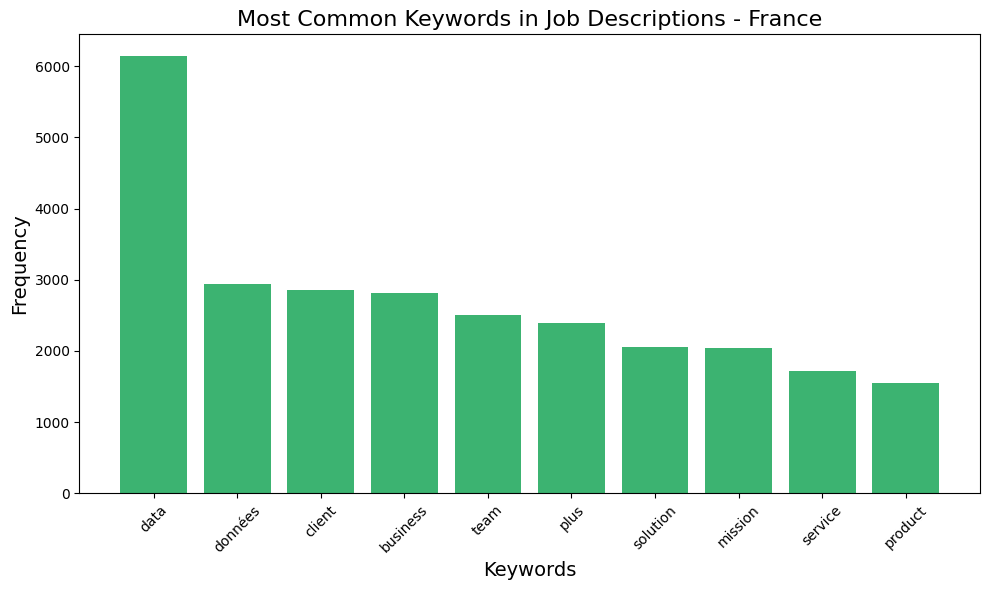

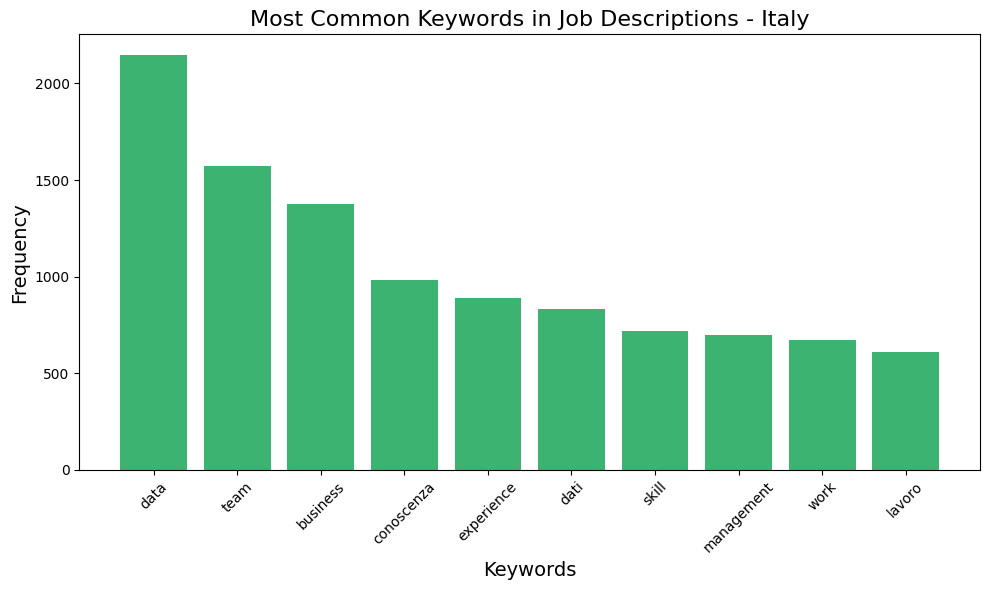

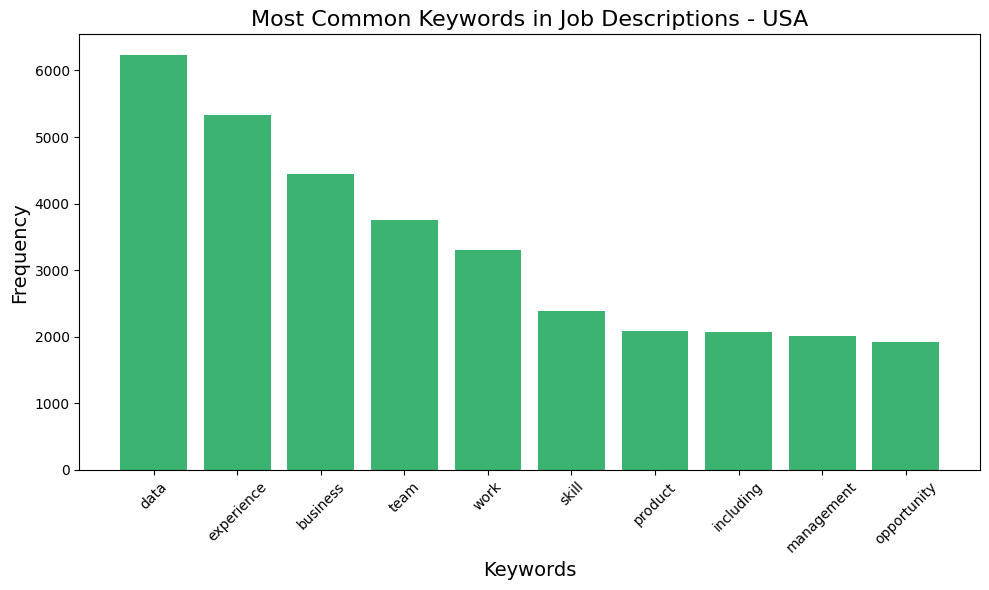

In [66]:
# Plot common keywords 
categorical_plots = {
    country_name: pf.plot_common_keywords(common_keywords[code][0], country_name)
    for code, (country_name, *_) in dicts.countries_languages.items()
}

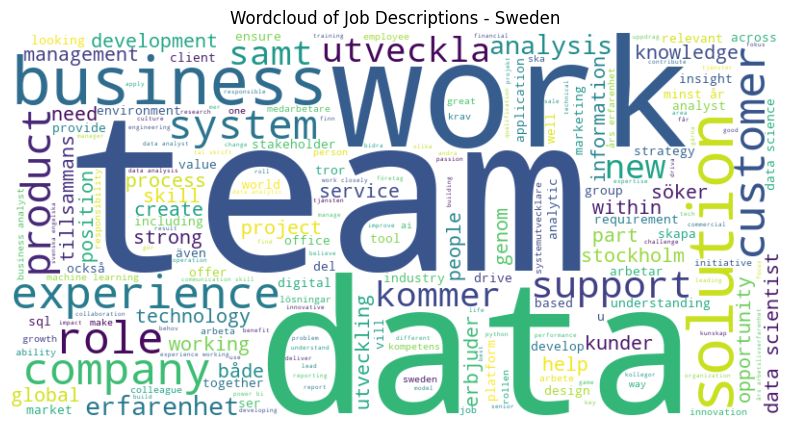

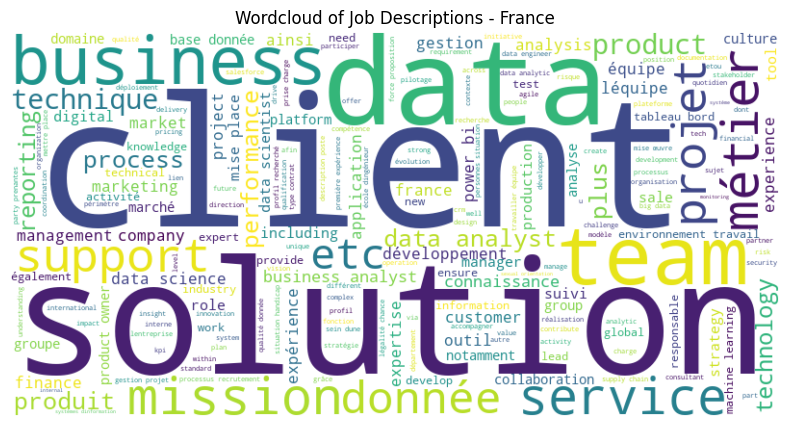

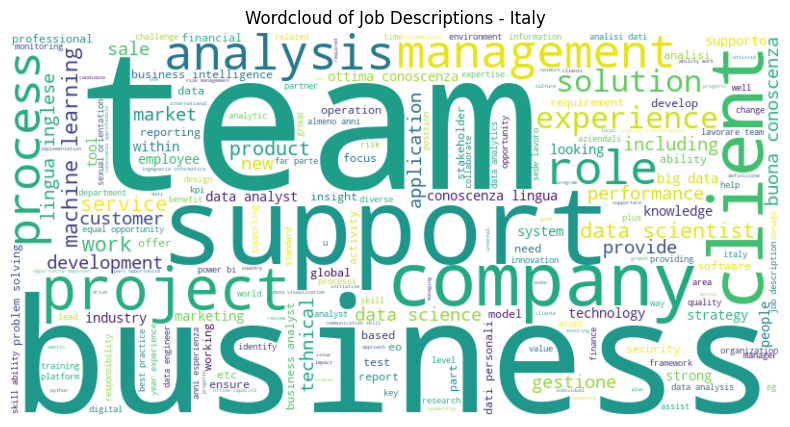

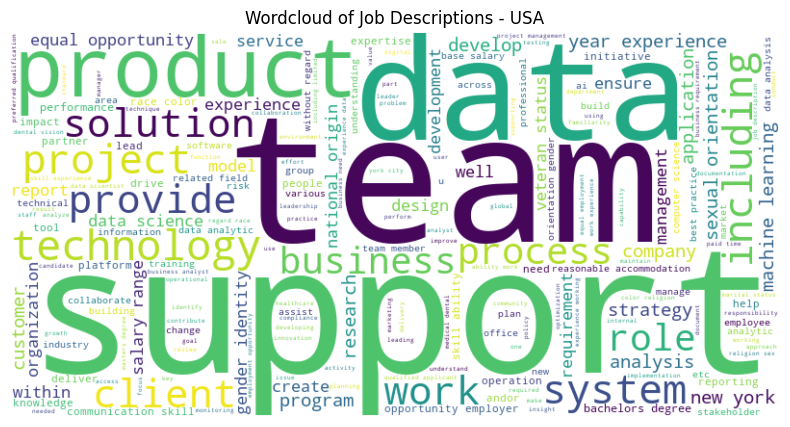

In [67]:
# Word cloud visualizations per country
for code, (name, _) in dicts.countries_languages.items():
    pf.plot_wordtree(common_keywords[code][1], name)

In [68]:
technical_skills.head()

Category   Keyword   Search Keyword Country  Count
368  Programming Languages/Software     excel  Product Analyst  France    279
297           Data Vis and BI Tools  power bi       BI Analyst  France    256
328               Development Tools       git  Product Analyst  France    228
365  Programming Languages/Software     excel       BI Analyst  France    199
819  Programming Languages/Software     excel       BI Analyst     USA    188

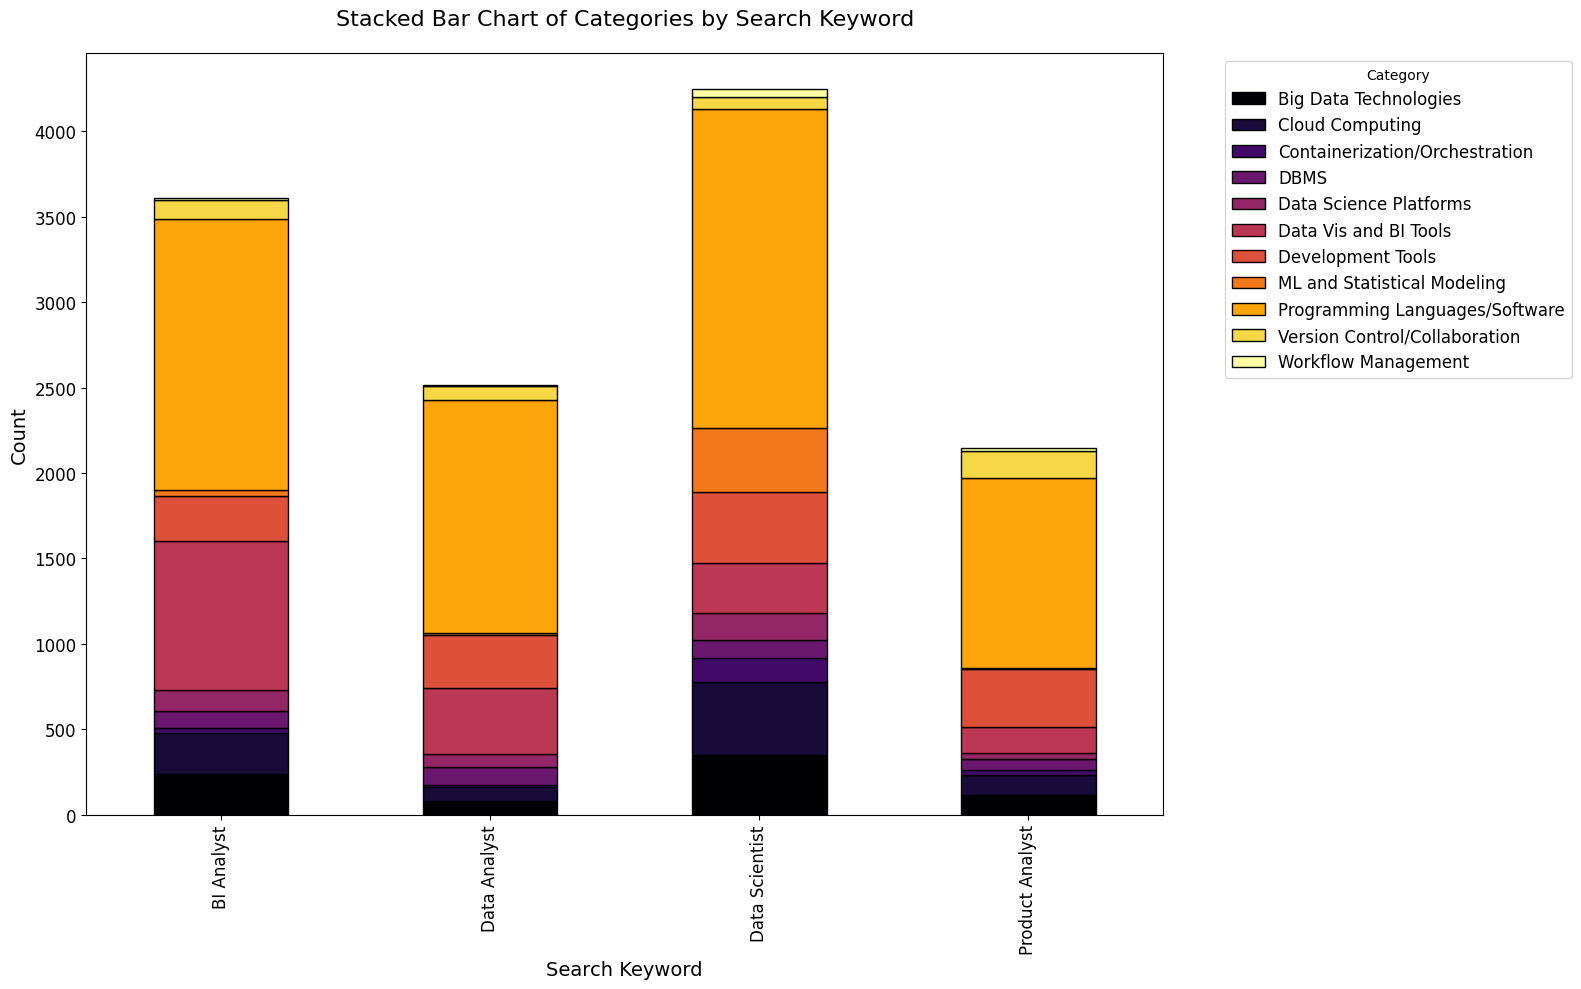

In [69]:
pf.plot_stacked_bar_chart(technical_skills)

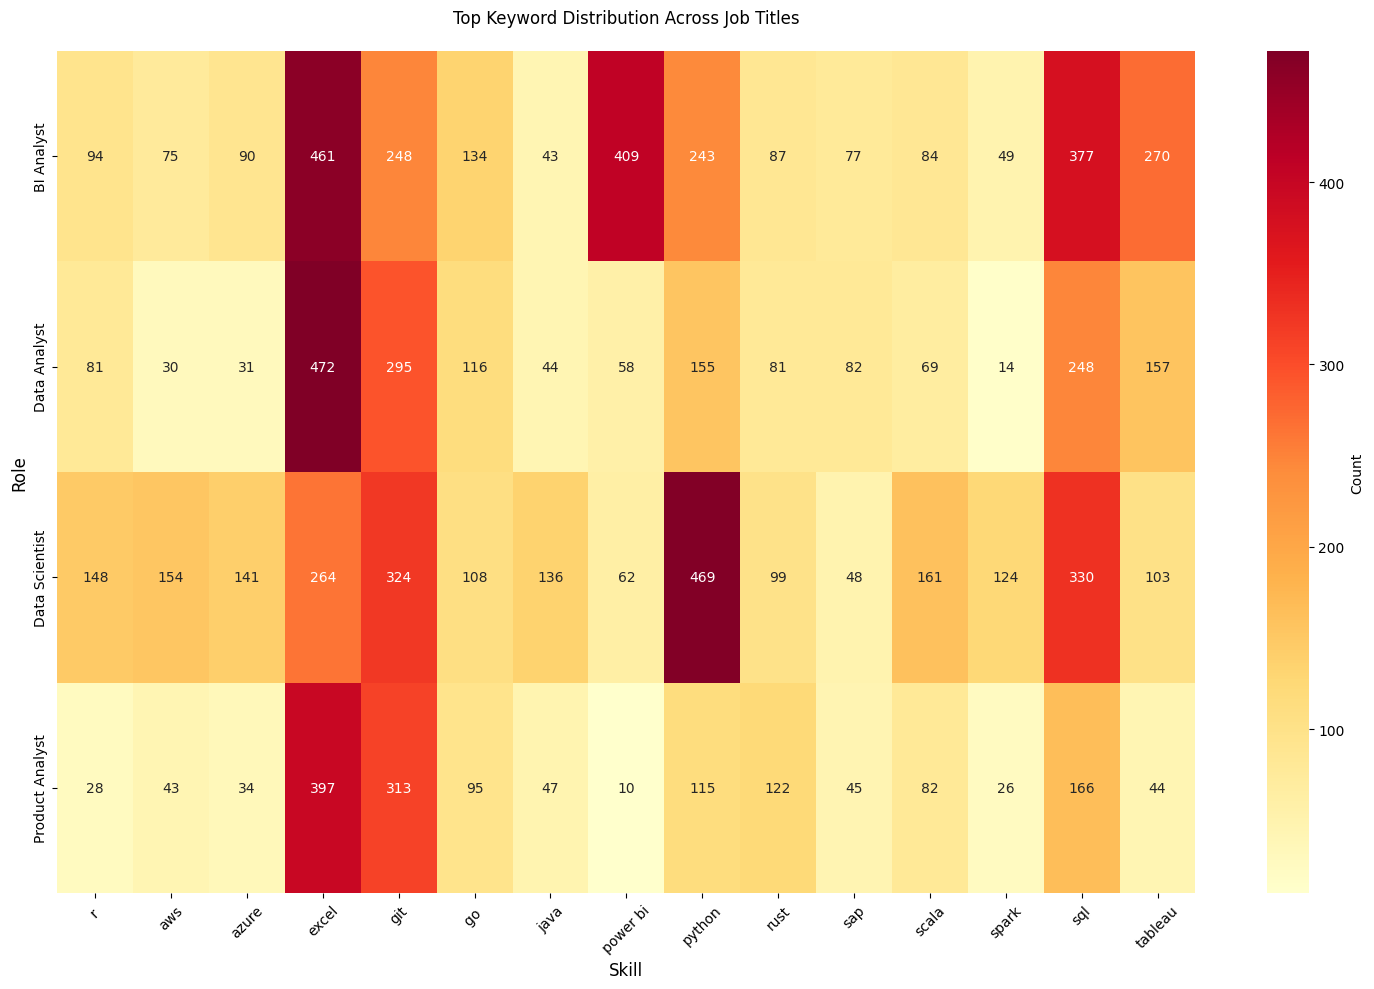

In [70]:
# Skills for different roles 
pf.plot_top_keyword_heatmap(technical_skills)

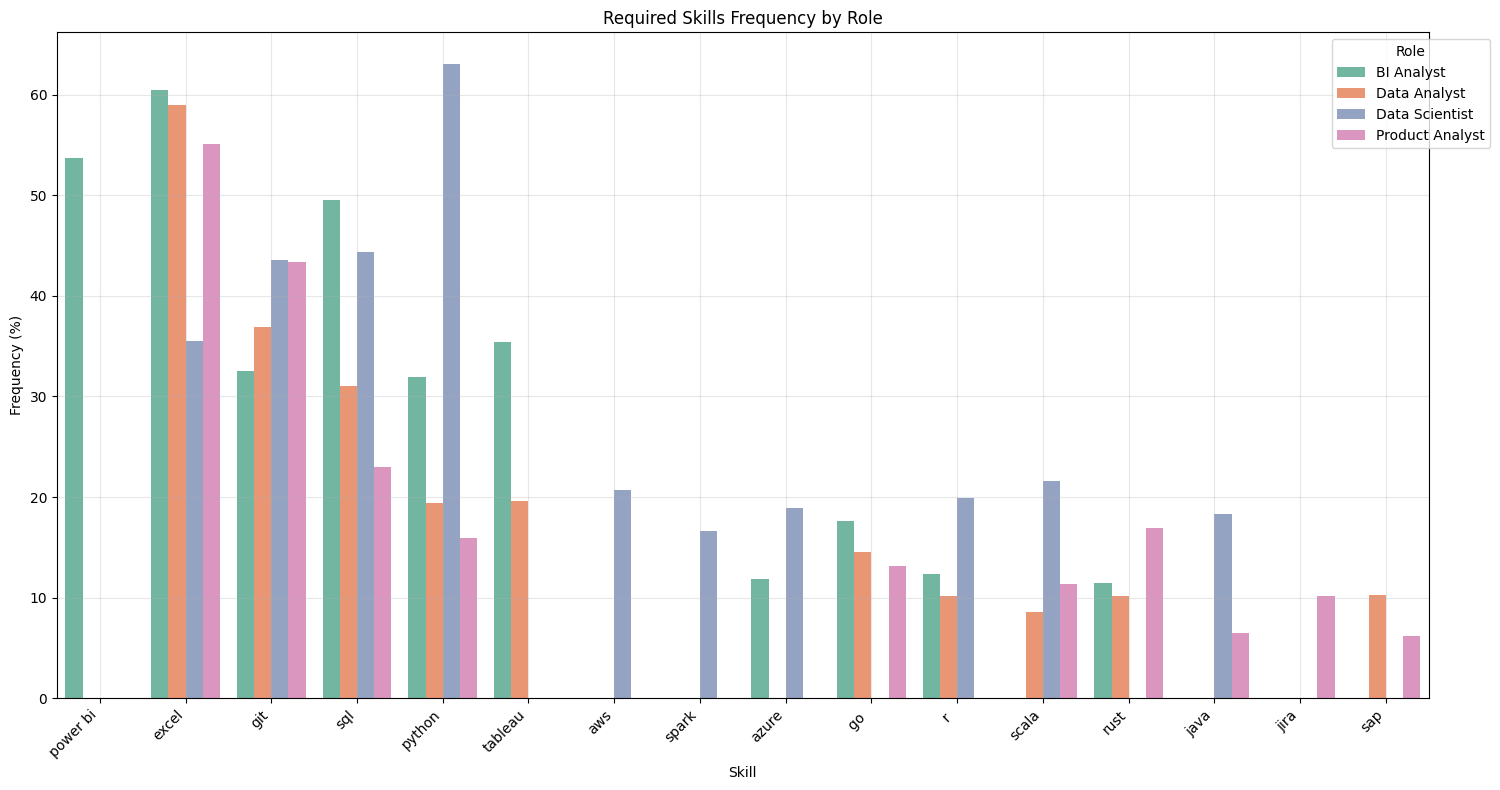

In [71]:
pf.plot_skills_bars(top_skills_by_role)

In [72]:
#plot_pentagon_keywords(top_skills_by_role)

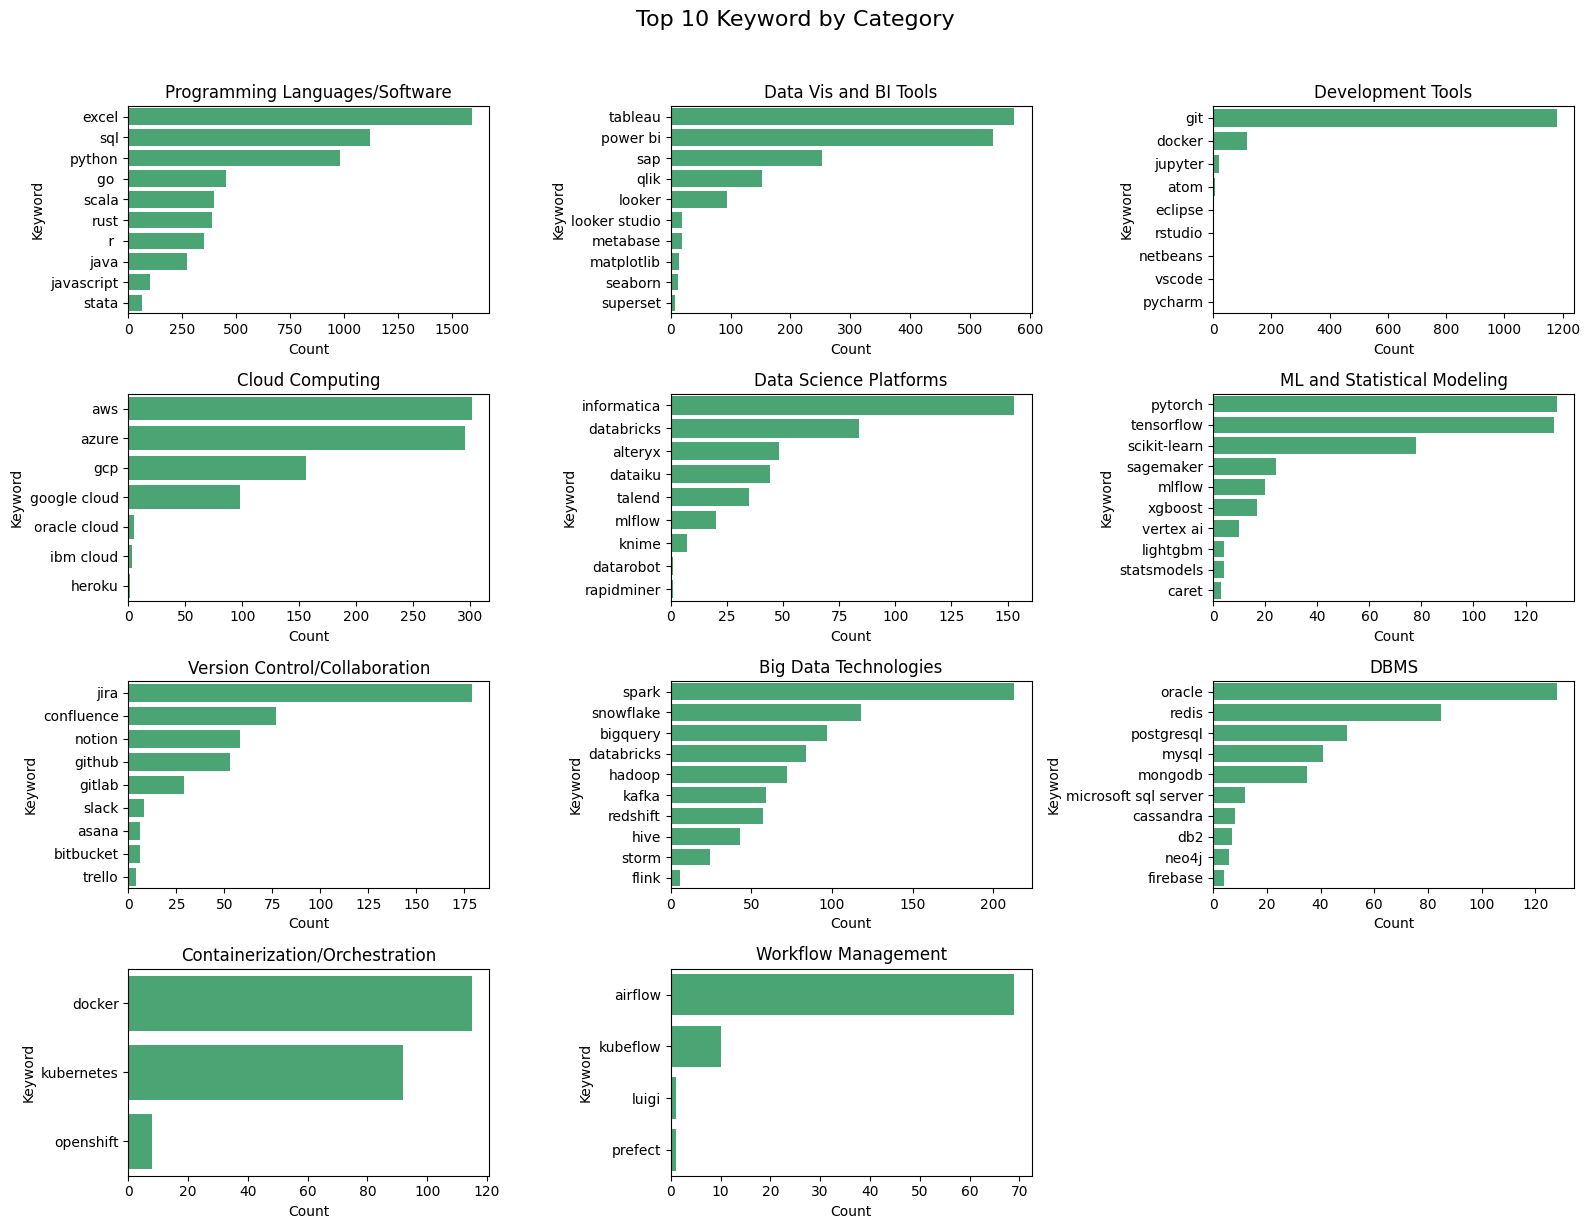

In [73]:
pf.plot_keywords_per_group_subplots(df=technical_skills, group_col='Category', keyword_col='Keyword', count_col='Count', n_top=10)

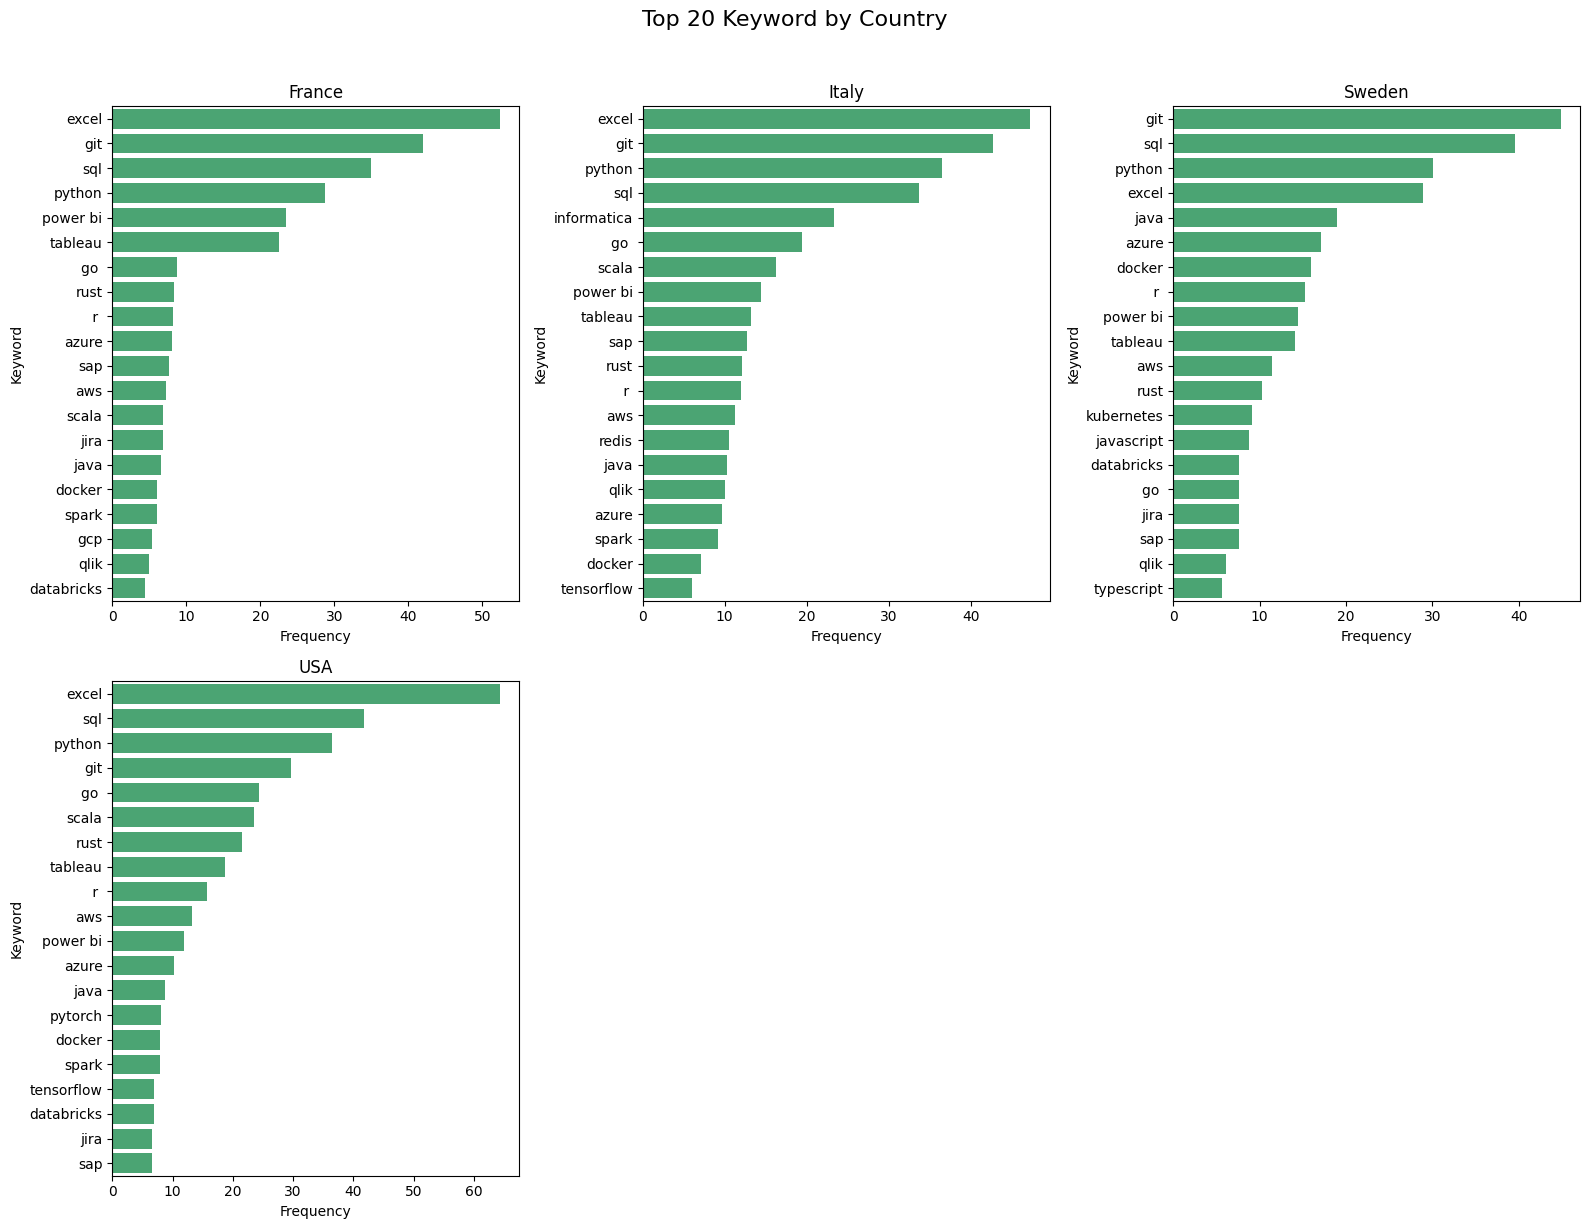

In [74]:
top_skills_by_country.head()
pf.plot_keywords_per_group_subplots(df=skills_country, group_col='Country', keyword_col='Keyword', count_col='Frequency', n_top=20)

In [75]:
global_skills.head()

Category  Keyword  Count  Frequency  Total_jobs
84  Programming Languages/Software    excel   1594      52.66        3027
62               Development Tools      git   1180      38.98        3027
97  Programming Languages/Software      sql   1121      37.03        3027
92  Programming Languages/Software   python    982      32.44        3027
57           Data Vis and BI Tools  tableau    574      18.96        3027

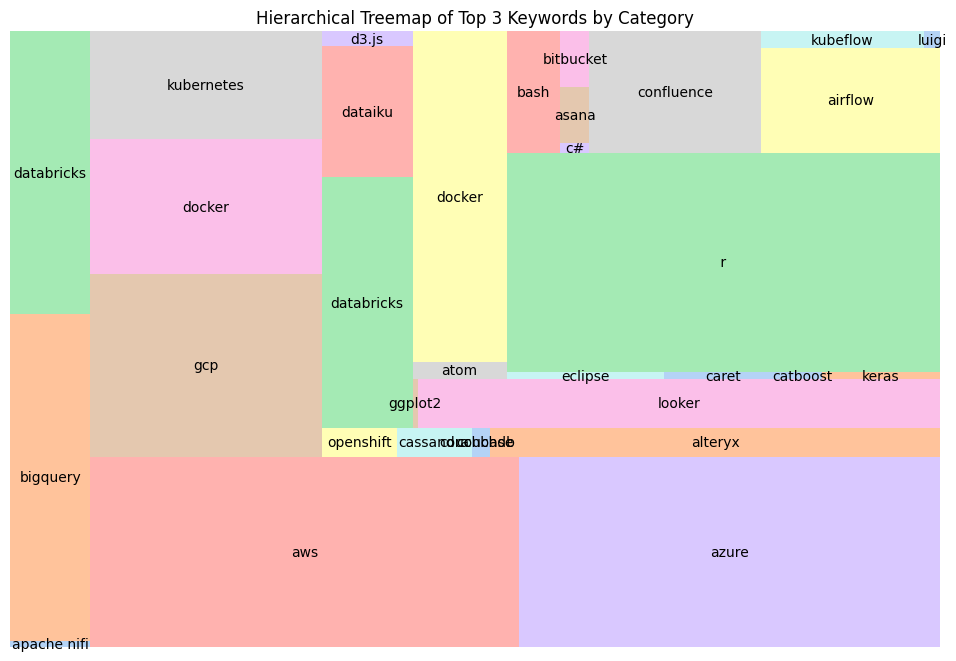

In [76]:
import squarify 

# Group data by category and sum up the counts
grouped_data = global_skills.groupby(['Category', 'Keyword'])['Count'].sum().reset_index()

# Filter top 10 keywords per category
top_keywords = grouped_data.groupby('Category').head(3)

# Create a color palette
colors = sns.color_palette("pastel", len(top_keywords['Category'].unique()))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_keywords['Count'], label=top_keywords['Keyword'], alpha=.8, color=colors)
plt.axis('off')
plt.title('Hierarchical Treemap of Top 3 Keywords by Category')
plt.show()

In [77]:
# Group the data by 'Keyword' and count the occurrences
keyword_counts = global_skills.groupby('Keyword').size()

# Check if 'Databricks' occurs more than once
if keyword_counts['databricks'] > 1:
    print("databricks occurs in multiple categories.")
else:
    print("Databricks occurs in only one category.")


databricks occurs in multiple categories.


In [78]:
# Filter the DataFrame for rows containing "Databricks"
databricks_rows = global_skills[global_skills['Keyword'] == 'docker']

# Get the unique categories
categories_with_databricks = databricks_rows['Category'].unique()

print(categories_with_databricks)

# Make sure there is no overlap between different categories 
# docker, databricks


['Containerization/Orchestration' 'Development Tools']


In [79]:
# Categorical variables
categorical_cols = ['search_keyword', 'country', 'job_title', 'company_name', 'company_location']

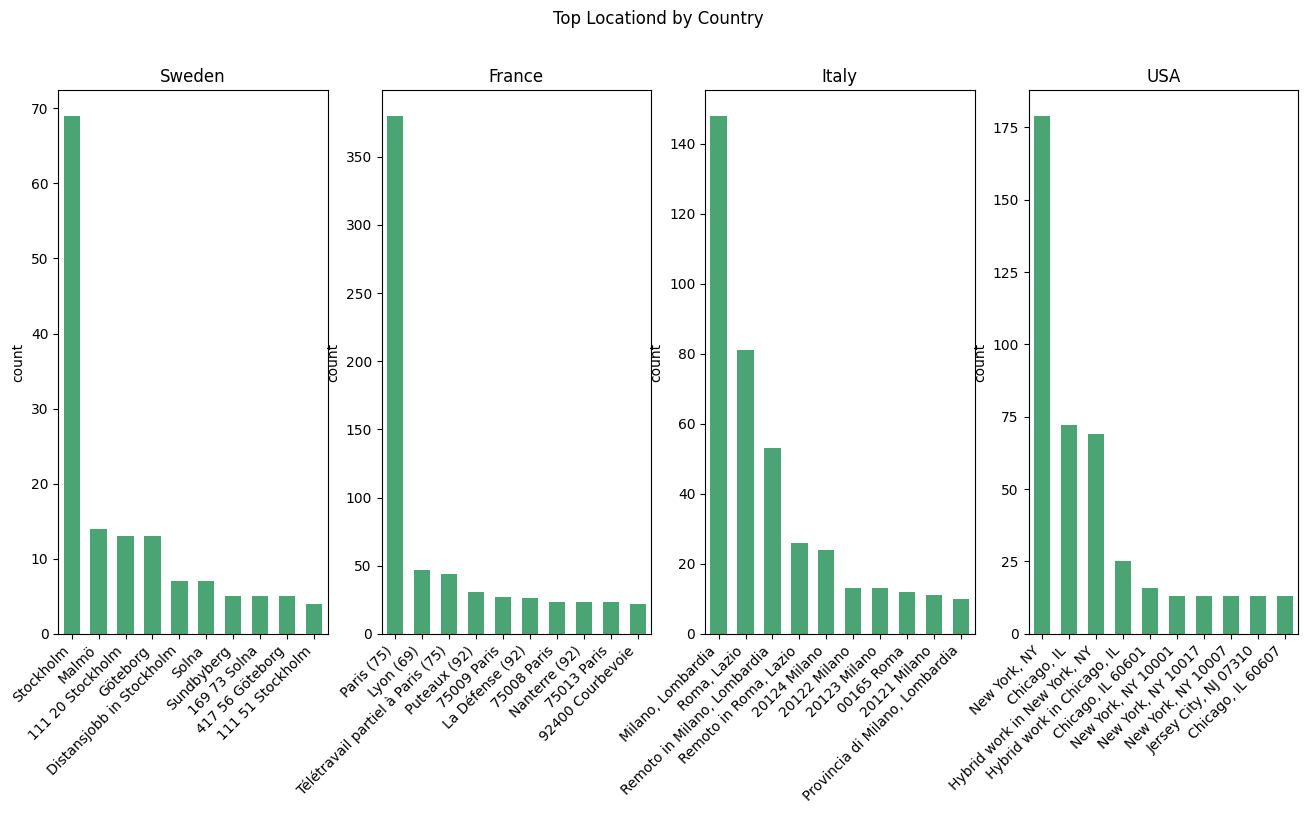

In [80]:
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='company_location',
    title='Top Locationd by Country'
)

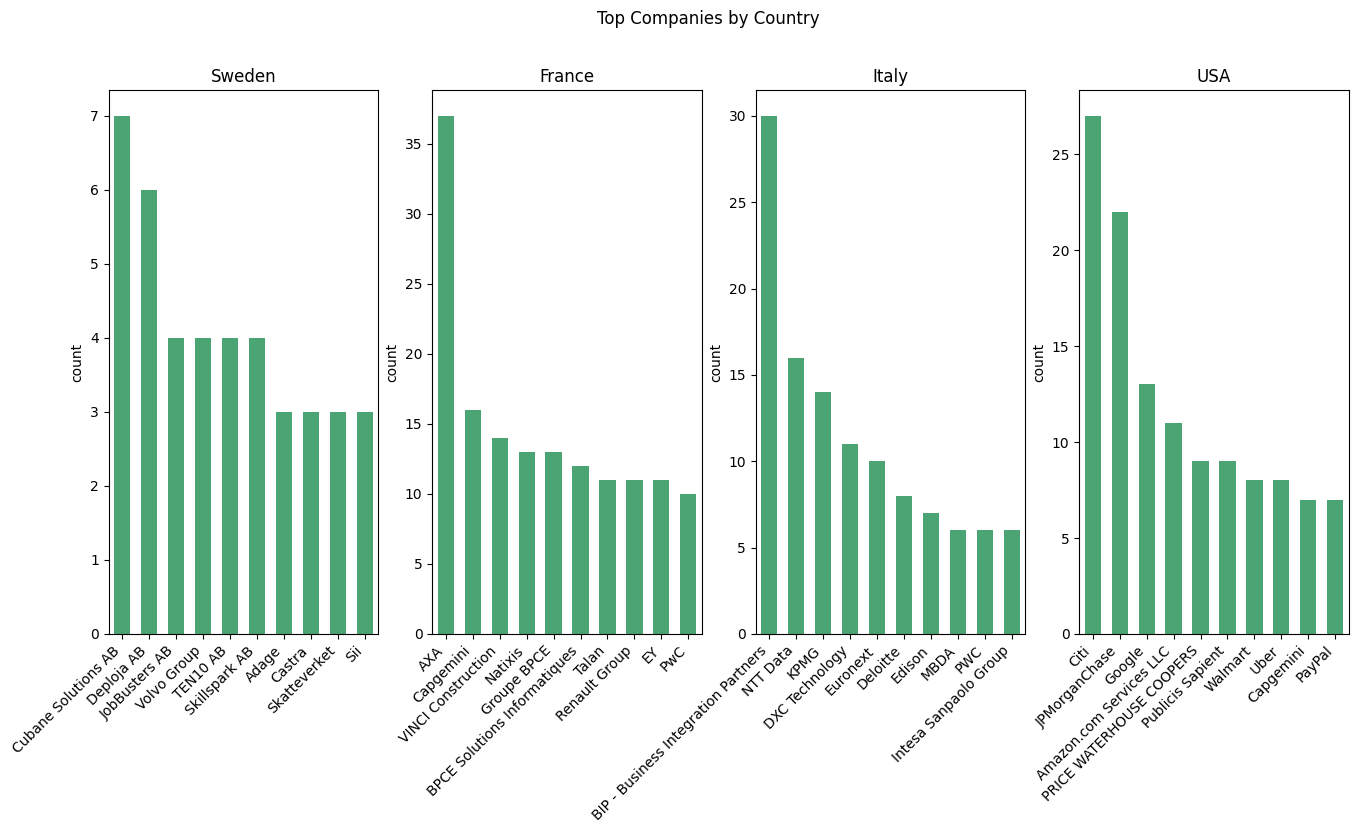

In [81]:
# Plot top company names per country
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='company_name',
    title='Top Companies by Country'
)

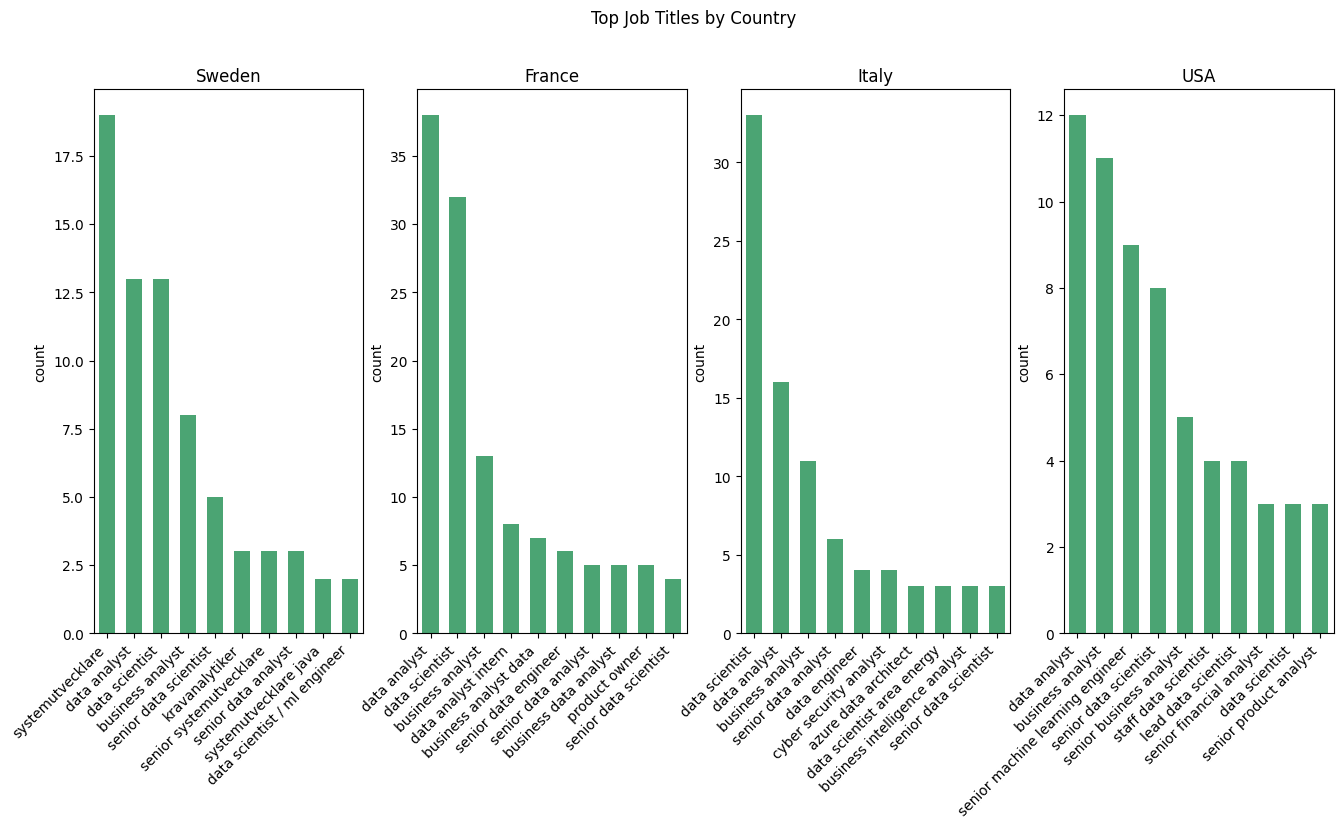

In [82]:
# For job titles by country
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='job_title',
    title='Top Job Titles by Country'
)

### Numerical features


Outliers for min_salary_month_EUR:
Number of outliers: 8
Outlier values:
€18,936.21
€19,561.35
€19,782.92
€19,782.92
€20,028.22
€20,028.22
€20,218.14
€20,574.23
Lower bound: €0.00
Upper bound: €18,595.94

Outliers for max_salary_month_EUR:
Number of outliers: 3
Outlier values:
€29,302.46
€31,565.62
€31,652.67
Lower bound: €0.00
Upper bound: €28,898.09


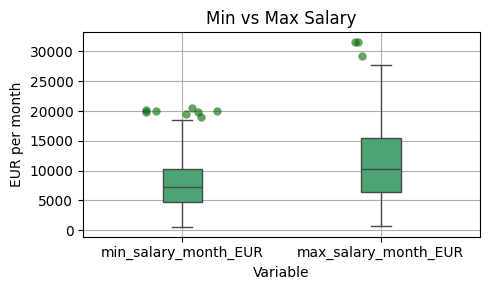

Summary statistics for salary columns:
       min_salary_month_EUR  max_salary_month_EUR
count                 799.0                 799.0
mean                7775.66              11143.76
std                 3899.59               5983.39
min                   500.0                 800.0
25%                  4747.9                6452.4
50%                 7289.13              10295.03
75%                10287.12              15430.68
max                20574.23              31652.67


In [83]:
# Summary statistics and boxplots for salary (outliers with jitter to more easily see them)
salary_cols = ['min_salary_month_EUR', 'max_salary_month_EUR']
outliers_df, outlier_rows = pf.plot_boxplot(df_combined, salary_cols)

print('Summary statistics for salary columns:')
print(df_combined[salary_cols].describe().round(2)) 

In [84]:
outlier_rows[['search_keyword', 'country', 'company_location', 'job_title', 'job_description_norm', 'min_salary_month_EUR', 'max_salary_month_EUR', 'outlier_source']]

search_keyword country                   company_location  \
2408  Data Scientist     USA                       New York, NY   
2433  Data Scientist     USA        Hybrid work in New York, NY   
2435  Data Scientist     USA  Hybrid work in New York, NY 10011   
2608      BI Analyst     USA                       New York, NY   
2609      BI Analyst     USA                       New York, NY   
2624      BI Analyst     USA                       New York, NY   
2652      BI Analyst     USA                       New York, NY   
2847  Data Scientist     USA                        Chicago, IL   
2349  Data Scientist     USA                 New York, NY 10001   

                                              job_title  \
2408                     grp dir, data sci/adv alt -svp   
2433                             founding ml researcher   
2435                             director, data science   
2608  executive director – data & analytics operatio...   
2609  executive director – data & analytics operatio...   
2624       vice president, pgs ai data analytics leader   
2652    vp, operational excellence & business analytics   
2847             senior/lead c++ engineer - market data   
2349  ai strategy & design - healthcare sector - sen...   

                                   job_description_norm  min_salary_month_EUR  \
2408  basic information location ny ny 100 w 33rd po...          20574.233333   
2433  garden garden gardenintel.com accelerates glob...          19782.916667   
2435  role peloton seeking experienced leader field ...             19561.348   
2608  reporting svp cross medium measurement  advanc...          20028.224833   
2609  executive director – data  analytics operation...          20028.224833   
2624  pfizer’s purpose breakthrough change patients’...          18936.207833   
2652  bizops sourcing  strategy group heart transfor...          20218.140833   
2847  ctc cutting-edge proprietary trading firm long...          19782.916667   
2349  ey you’ll chance build career unique are globa...          11284.175667   

      max_salary_month_EUR         outlier_source  
2408          22948.183333             min salary  
2433          31652.666667  min salary,max salary  
2435          25432.917667             min salary  
2608          26857.287667             min salary  
2609          26857.287667             min salary  
2624          31565.621833  min salary,max salary  
2652            25994.7525             min salary  
2847          20574.233333             min salary  
2349          29302.456167             max salary

What are these outliers representing and where are they coming from? 
- All from USA (mostly NY). 
- Founder, director, vice president, VP, and other senior roles. 

Lets also look at the smallest salaries and where they come from. 

In [85]:
# Get min salaries and see if there is a pattern
min_salaries = (df_combined
                  .dropna(subset=['min_salary_month_EUR'])  # Remove rows with NA salaries
                  .nsmallest(10, 'min_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'country', 'company_location', 'min_salary_month_EUR', 'salary']])

min_salaries

search_keyword                                          job_title  \
1698    Data Analyst                                     junior analyst   
265     Data Analyst                alternance - assistant data analyst   
1286      BI Analyst      alternant(e) data analyst connaissance client   
290     Data Analyst    alternant data analyst en business intelligence   
1819    Data Analyst                                cloud/data engineer   
650   Data Scientist                        stage - data analyst junior   
1690    Data Analyst                     logistics analyst - internship   
727   Data Scientist                            alternance data analyst   
513     Data Analyst  transversal business analyst - stage - paris (...   
1407      BI Analyst                               data analyst - stage   

                   company_name country  \
1698                 Wayshi srl   Italy   
265                  CMI France  France   
1286                 IMX FRANCE  France   
290                   HEC Paris  France   
1819  Quick Algorithm Analytics   Italy   
650                         AXA  France   
1690                    Samsung   Italy   
727            The Nuum Factory  France   
513                   papernest  France   
1407      SAS Terroirs d'Avenir  France   

                                  company_location  min_salary_month_EUR  \
1698                                  20122 Milano                 500.0   
265   Télétravail partiel à 92300 Levallois-Perret                 721.0   
1286            Télétravail partiel à 93500 Pantin                759.78   
290                            78350 Jouy-en-Josas                 800.0   
1819                   Remoto in Milano, Lombardia                 800.0   
650                                  Suresnes (92)                 832.0   
1690                             Milano, Lombardia                 900.0   
727                                  69009 Lyon 9e                 926.0   
513              Télétravail partiel à 75019 Paris                1000.0   
1407   Télétravail partiel à 94400 Vitry-sur-Seine                1000.0   

                                                 salary  
1698                            500 € - 1.300 € al mese  
265         De 721 € à 1 747 € par mois  -   Alternance  
1286  De 759,78 € à 1 766,92 € par mois  -   Alternance  
290         De 800 € à 1 500 € par mois  -   Alternance  
1819                                      800 € al mese  
650   De 832 € à 1 868 € par mois  -   Temps partiel...  
1690                                      900 € al mese  
727          À partir de 926 € par mois  -   Alternance  
513            De 1 000 € à 1 300 € par mois  -   Stage  
1407     De 1 000 € à 1 400 € par mois  -   Temps plein

The lowest salaries are from France and Italy, for internships, 'alternance', and junior roles. 

In [86]:
# Get top salaries in France and see if there is a pattern
top_fr_salaries = (df_combined[df_combined['country'] == 'France']
                  .dropna(subset=['max_salary_month_EUR'])  # Remove rows with NA salaries
                  .nlargest(10, 'max_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'company_location', 'max_salary_month_EUR', 'salary']])

top_fr_salaries

search_keyword                                          job_title  \
1559       BI Analyst  cloud analyste informatique - azure aws finops...   
1017  Product Analyst                  data gouvernance (it) / freelance   
1448       BI Analyst  data analyste informatique expert sas (it) / f...   
488      Data Analyst  senior data analyste informatique / data gouve...   
382      Data Analyst  géologiste - data analyste informatique - 270 ...   
404      Data Analyst  business data analyste informatique - solvency...   
1306       BI Analyst  geodata scientist / analyste informatique (it)...   
1368       BI Analyst  data analyste informatique / développeur bi ta...   
1474       BI Analyst  business analyste informatique - gm / emtn (it...   
768   Product Analyst         business analyst si gestion des défauts...   

                    company_name          company_location  \
1559                 PROPULSE IT  Télétravail à Paris (75)   
1017                    PARTENOR                Paris (75)   
1448          Cogniwave dynamics                Paris (75)   
488                      LeHibou                Paris (75)   
382                    ISUPPLIER                Paris (75)   
404                      NEXORIS                Paris (75)   
1306  ODHCOM - FREELANCEREPUBLIK                Paris (75)   
1368                Bek Advisory                Paris (75)   
1474                     NEXORIS                Paris (75)   
768                  1Dsolutions                Paris (75)   

      max_salary_month_EUR                                             salary  
1559               18000.0  De 450 € à 900 € par jour  -   Statut cadre, I...  
1017               15200.0  De 520 € à 760 € par jour  -   Indépendant / f...  
1448               14000.0  De 600 € à 700 € par jour  -   Indépendant / f...  
488                13000.0        650 € par jour  -   Indépendant / freelance  
382                12900.0        645 € par jour  -   Indépendant / freelance  
404                12000.0  De 550 € à 600 € par jour  -   Indépendant / f...  
1306               12000.0  De 480 € à 600 € par jour  -   Indépendant / f...  
1368               12000.0        600 € par jour  -   Indépendant / freelance  
1474               12000.0  De 590 € à 600 € par jour  -   Indépendant / f...  
768                11000.0                    550 € par jour  -   Temps plein

Highest salaries in France are for indépendant / freelance jobs in Paris, paid by day rate. 

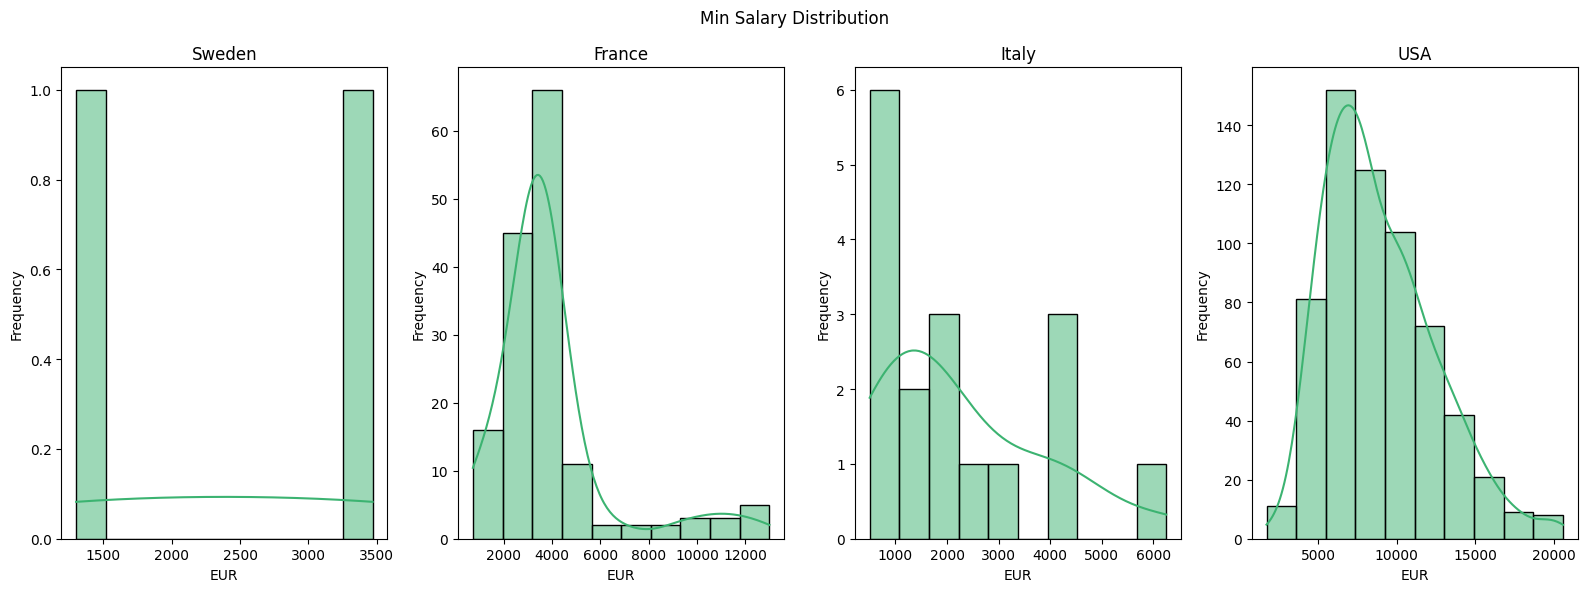

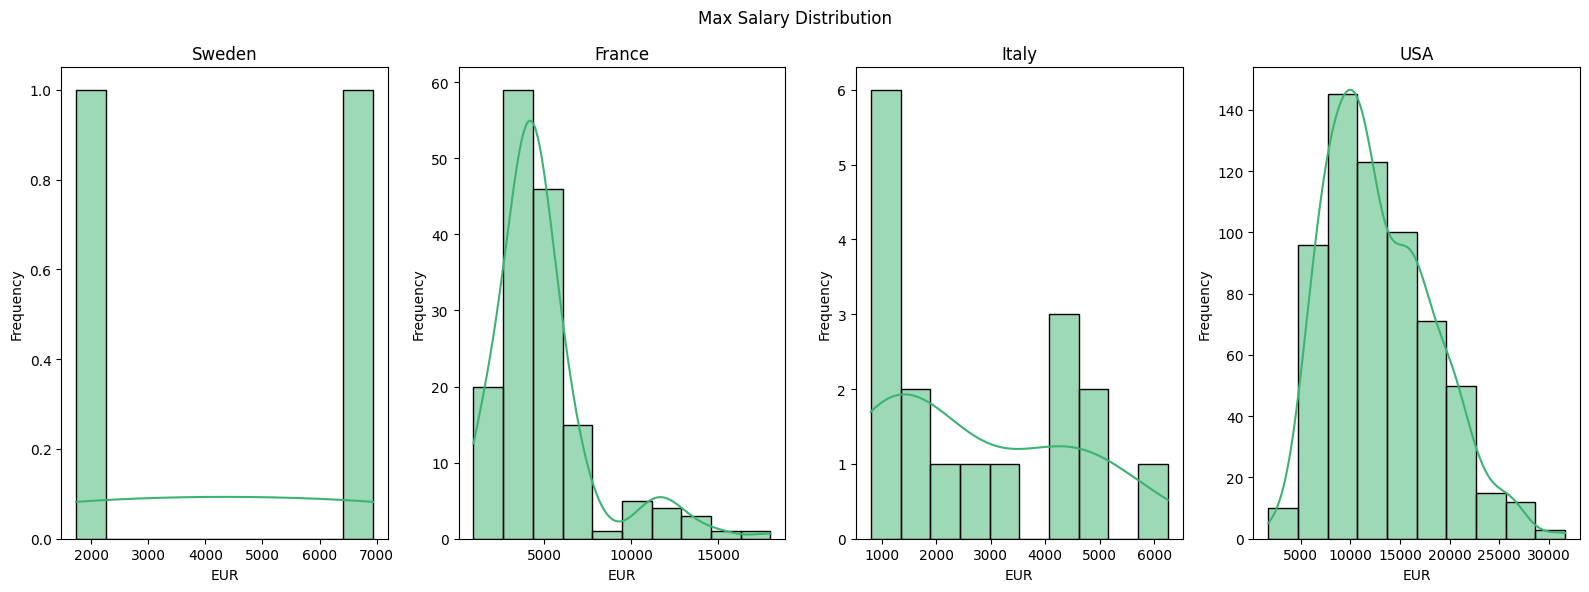

In [87]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[0], 
    bins = 10, 
    kde = True, 
    title = 'Min Salary Distribution'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[1], 
    bins = 10, 
    kde = True, 
    title = 'Max Salary Distribution'
)

In [89]:
salary_ranges = (
    df_combined
    .groupby('country', observed=True)
    .agg({
        'min_salary_month_EUR': 'min',
        'max_salary_month_EUR': 'max'
    })
    .rename(columns={
        'min_salary_month_EUR': 'Lowest Monthly Salary (EUR)',
        'max_salary_month_EUR': 'Highest Monthly Salary (EUR)'
    })
)

salary_ranges

Lowest Monthly Salary (EUR)  Highest Monthly Salary (EUR)
country                                                           
France                         721.0                       18000.0
Italy                          500.0                        6250.0
Sweden                        1301.1                        6939.2
USA                         1709.244                  31652.666667

Lets look into the second peaks (e.g. max salary for France, with second peak after 10 000 EUR). 

In [90]:
# Filter by country 
filtered_df = df_combined[(df_combined['country'] == 'France') & 
                         (df_combined['min_salary_month_EUR'].notna())]

# Filter salary range 
filtered_df = filtered_df[(filtered_df['max_salary_month_EUR'] > 10000) & 
           (filtered_df['max_salary_month_EUR'] < 16000)]

filtered_df.head()

job_id  page                                           job_link  \
382      639    22  https://www.indeed.fr/rc/clk?jk=9bf7127dab79a5...   
404      705    26  https://www.indeed.fr/rc/clk?jk=1576873c14d2f5...   
488      882    38  https://www.indeed.fr/rc/clk?jk=a18f4e1522a6bc...   
768     1414     2  https://www.indeed.fr/rc/clk?jk=7743e6fa91e27d...   
1014    1750    24  https://www.indeed.fr/rc/clk?jk=a7b21bcbaba540...   

       search_keyword search_location  \
382      Data Analyst      Paris (75)   
404      Data Analyst      Paris (75)   
488      Data Analyst      Paris (75)   
768   Product Analyst      Paris (75)   
1014  Product Analyst      Paris (75)   

                                              job_title company_name  \
382   géologiste - data analyste informatique - 270 ...    ISUPPLIER   
404   business data analyste informatique - solvency...      NEXORIS   
488   senior data analyste informatique / data gouve...      LeHibou   
768          business analyst si gestion des défauts...  1Dsolutions   
1014  data analyste informatiquee gcp / sql / big qu...     HIGHTEAM   

                 company_location  \
382                    Paris (75)   
404                    Paris (75)   
488                    Paris (75)   
768                    Paris (75)   
1014  Télétravail à Île-de-France   

                                                 salary  \
382         645 € par jour  -   Indépendant / freelance   
404   De 550 € à 600 € par jour  -   Indépendant / f...   
488         650 € par jour  -   Indépendant / freelance   
768                     550 € par jour  -   Temps plein   
1014  De 500 € à 550 € par jour  -   Indépendant / f...   

                                        job_description  ...         region  \
382   Compétences : géologie ? biostratigraphie / sé...  ...  Île-de-France   
404   Nous recherchons, pour l'un de nos partenaire ...  ...  Île-de-France   
488   Analyse de l?existant et recommandations techn...  ...  Île-de-France   
768   TJM 550€ 
 
 
 
 
 
 
 
 
 
 PARIS 
 
 
 
 
 
...  ...  Île-de-France   
1014  Une offre de solutions de data analyse et de c...  ...  Île-de-France   

     country min_salary max_salary currency time_unit min_salary_monthly  \
382   France      645.0      645.0     euro       day            12900.0   
404   France      550.0      600.0     euro       day            11000.0   
488   France      650.0      650.0     euro       day            13000.0   
768   France      550.0      550.0     euro       day            11000.0   
1014  France      500.0      550.0     euro       day            10000.0   

      max_salary_monthly  min_salary_month_EUR max_salary_month_EUR  
382              12900.0               12900.0              12900.0  
404              12000.0               11000.0              12000.0  
488              13000.0               13000.0              13000.0  
768              11000.0               11000.0              11000.0  
1014             11000.0               10000.0              11000.0  

[5 rows x 25 columns]

In [91]:
identical_cols = filtered_df.apply(lambda x: len(x.unique()) == 1)
print("Columns with identical values:", identical_cols[identical_cols].index.tolist())
print("\nThe identical values are:")

for col in identical_cols[identical_cols].index:
    print(f"{col}: {filtered_df[col].iloc[0]}")

filtered_df[filtered_df.apply(lambda x: len(x.unique()) == 1).index].head()

Columns with identical values: ['date', 'language', 'country', 'currency', 'time_unit']

The identical values are:
date: 2024-09-20 00:00:00
language: french
country: France
currency: euro
time_unit: day


job_id  page                                           job_link  \
382      639    22  https://www.indeed.fr/rc/clk?jk=9bf7127dab79a5...   
404      705    26  https://www.indeed.fr/rc/clk?jk=1576873c14d2f5...   
488      882    38  https://www.indeed.fr/rc/clk?jk=a18f4e1522a6bc...   
768     1414     2  https://www.indeed.fr/rc/clk?jk=7743e6fa91e27d...   
1014    1750    24  https://www.indeed.fr/rc/clk?jk=a7b21bcbaba540...   

       search_keyword search_location  \
382      Data Analyst      Paris (75)   
404      Data Analyst      Paris (75)   
488      Data Analyst      Paris (75)   
768   Product Analyst      Paris (75)   
1014  Product Analyst      Paris (75)   

                                              job_title company_name  \
382   géologiste - data analyste informatique - 270 ...    ISUPPLIER   
404   business data analyste informatique - solvency...      NEXORIS   
488   senior data analyste informatique / data gouve...      LeHibou   
768          business analyst si gestion des défauts...  1Dsolutions   
1014  data analyste informatiquee gcp / sql / big qu...     HIGHTEAM   

                 company_location  \
382                    Paris (75)   
404                    Paris (75)   
488                    Paris (75)   
768                    Paris (75)   
1014  Télétravail à Île-de-France   

                                                 salary  \
382         645 € par jour  -   Indépendant / freelance   
404   De 550 € à 600 € par jour  -   Indépendant / f...   
488         650 € par jour  -   Indépendant / freelance   
768                     550 € par jour  -   Temps plein   
1014  De 500 € à 550 € par jour  -   Indépendant / f...   

                                        job_description  ...         region  \
382   Compétences : géologie ? biostratigraphie / sé...  ...  Île-de-France   
404   Nous recherchons, pour l'un de nos partenaire ...  ...  Île-de-France   
488   Analyse de l?existant et recommandations techn...  ...  Île-de-France   
768   TJM 550€ 
 
 
 
 
 
 
 
 
 
 PARIS 
 
 
 
 
 
...  ...  Île-de-France   
1014  Une offre de solutions de data analyse et de c...  ...  Île-de-France   

     country min_salary max_salary currency time_unit min_salary_monthly  \
382   France      645.0      645.0     euro       day            12900.0   
404   France      550.0      600.0     euro       day            11000.0   
488   France      650.0      650.0     euro       day            13000.0   
768   France      550.0      550.0     euro       day            11000.0   
1014  France      500.0      550.0     euro       day            10000.0   

      max_salary_monthly  min_salary_month_EUR max_salary_month_EUR  
382              12900.0               12900.0              12900.0  
404              12000.0               11000.0              12000.0  
488              13000.0               13000.0              13000.0  
768              11000.0               11000.0              11000.0  
1014             11000.0               10000.0              11000.0  

[5 rows x 25 columns]

Observations: 
- **Sweden**: Only has 2 data points. This was the smallest dataset but it also makes sense that there are few values isnce Swedish interview processes usually do not involve discussing salaries until the very end of the rounds. 
- **France**: It almost looks like there are two peaks. This is because we have several rows with high salaries for freelance work in Paris. 
- **Italy**: Also has a second peak for jobs in Milano. But this is also be since we have fewer data points. 
- **USA**: Significantly higher salaries overall, as to be expected. 

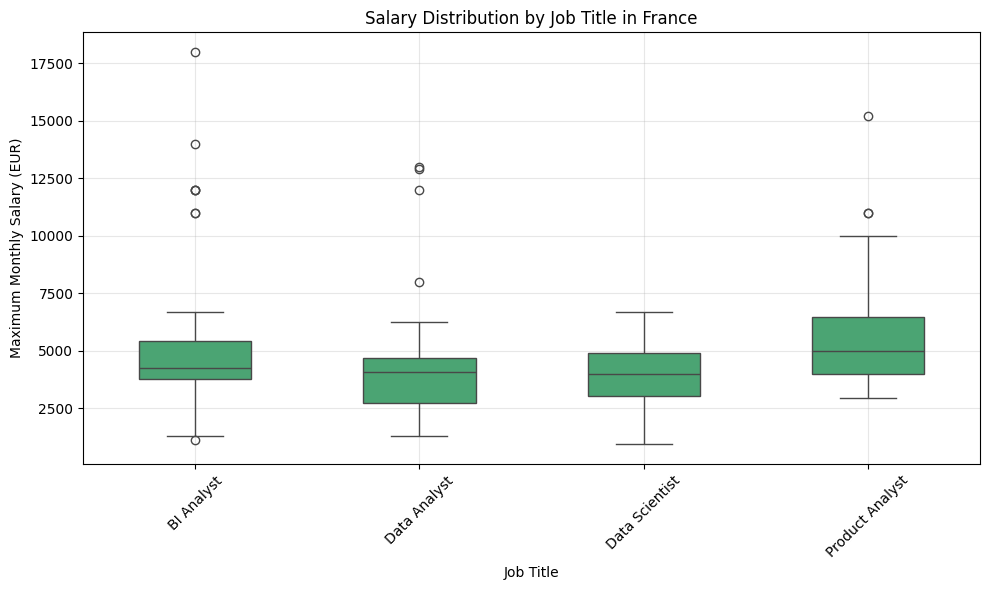

In [92]:
def plot_salary_by_keyword(df: pd.DataFrame, figsize: tuple[int, int] = (10, 6)) -> None:
    """Create boxplot of salaries by search keyword for France."""
    plt.figure(figsize=figsize)
    
    sns.boxplot(
        data=df.query("country == 'France'"),
        x='search_keyword',
        y='max_salary_month_EUR',
        color='mediumseagreen',
        width=0.5
    )
    
    plt.xlabel('Job Title')
    plt.ylabel('Maximum Monthly Salary (EUR)')
    plt.title('Salary Distribution by Job Title in France')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Use it like this:
plot_salary_by_keyword(df_combined)

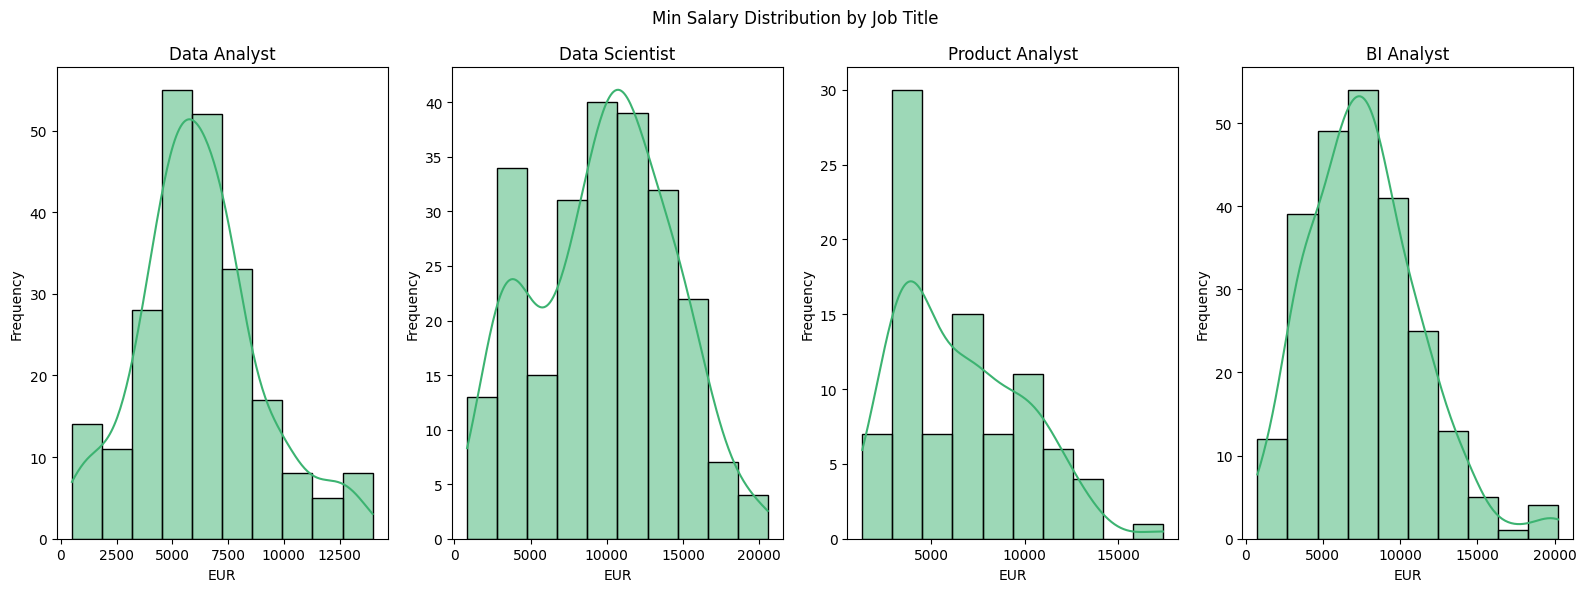

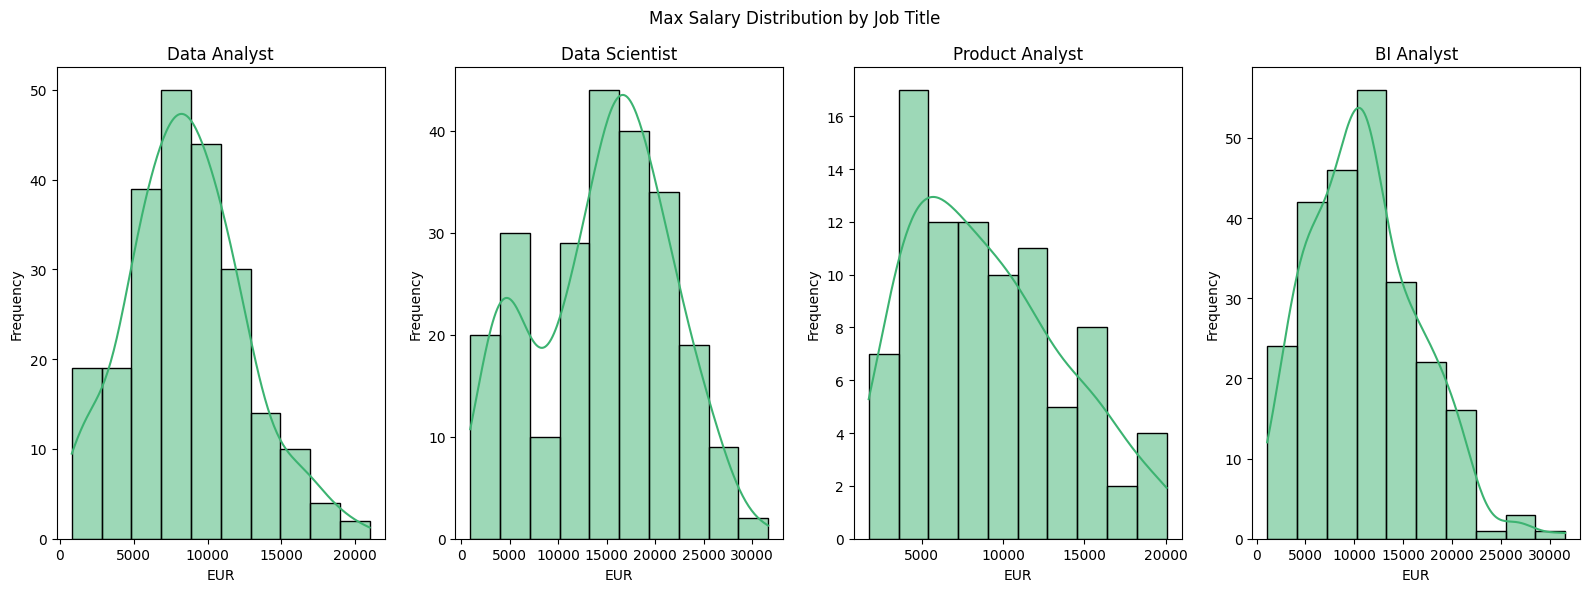

In [93]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='min_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Min Salary Distribution by Job Title'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='max_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Max Salary Distribution by Job Title'
)

## Bivariate analysis 

In [ ]:
## Bivariate and Multivariate Analysis
# - Pairwise correlations
# - Relationships between key variables
# Statistical tests to see if there are significant differences in salaries for these search terms 

In [97]:
df_combined.columns

Index(['job_id', 'page', 'job_link', 'search_keyword', 'search_location',
       'job_title', 'company_name', 'company_location', 'salary',
       'job_description', 'date', 'language', 'job_description_norm',
       'city_name', 'department', 'region', 'country', 'min_salary',
       'max_salary', 'currency', 'time_unit', 'min_salary_monthly',
       'max_salary_monthly', 'min_salary_month_EUR', 'max_salary_month_EUR'],
      dtype='object')

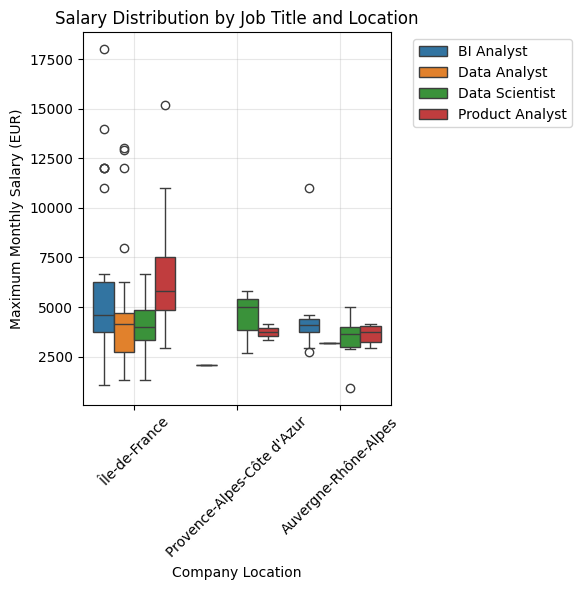

In [103]:
def plot_box(df: pd.DataFrame, 
            y: str = 'max_salary_month_EUR',
            x: str = 'region',
            hue: str = 'job_title',
            figsize: tuple[int, int] = (10, 6)) -> None:
    """
    Create boxplot showing salary distribution by location and job title.
    """
    plt.figure(figsize=figsize)
    
    sns.boxplot(
        data=df,
        x=x,          # locations on x-axis
        y=y,          # salary on y-axis
        hue=hue,      # separate boxes by job title
        width=0.8
    )
    
    plt.xlabel('Company Location')
    plt.ylabel('Maximum Monthly Salary (EUR)')
    plt.title('Salary Distribution by Job Title and Location')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Get the 10 most common locations
common_locations = (df_combined
                   .query("country == 'France'")
                   ['region']
                   .value_counts()
                   .nlargest(10)
                   .index)

# Plot using filtered data
plot_box(
    df=df_combined.query("country == 'France' and region in @common_locations"),
    y='max_salary_month_EUR', 
    x='region', 
    hue='search_keyword',
    figsize=(6, 6)
)

In [ ]:
# Disregarding the country in question, are data scientist salaries significantly higher?

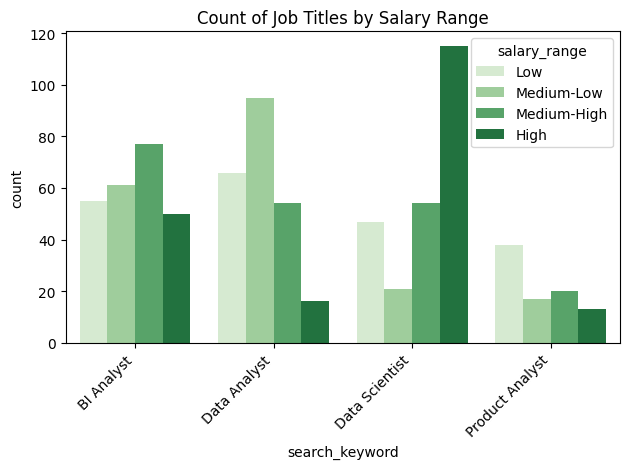

In [104]:
# Create salary bins
df_combined['salary_range'] = pd.qcut(
    df_combined['min_salary_month_EUR'], 
    q=4,  # Creates 4 equal-sized groups
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

# Create the plot with correct color syntax
sns.countplot(
    data=df_combined, 
    x='search_keyword', 
    hue='salary_range',
    palette='Greens'  # Using a green color palette
)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Job Titles by Salary Range')
plt.tight_layout()
plt.show()

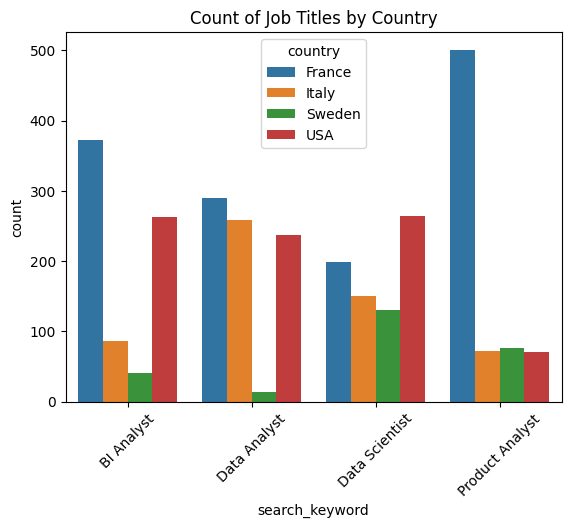

In [105]:
sns.countplot(data=df_combined, x='search_keyword', hue='country')
plt.xticks(rotation=45)
plt.title('Count of Job Titles by Country')
plt.show()

Why are there tons of Product Analyst jobs in France? Also tons of BI Analyst jobs. 
    
There are a bunch of data analyst (also data scientist) jobs that are very well paid. Do they have anything in common? 

In [106]:
import scipy.stats as stats
salary_ranges = pd.cut(df_combined['min_salary_month_EUR'], bins=[0, 20000, 40000, 60000, 80000, 100000], labels=['<20k', '20-40k', '40-60k', '60-80k', '80-100k'])
crosstab = pd.crosstab(df_combined['search_keyword'], salary_ranges)
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 4.262313392127897, p-value: 0.23449671185479673


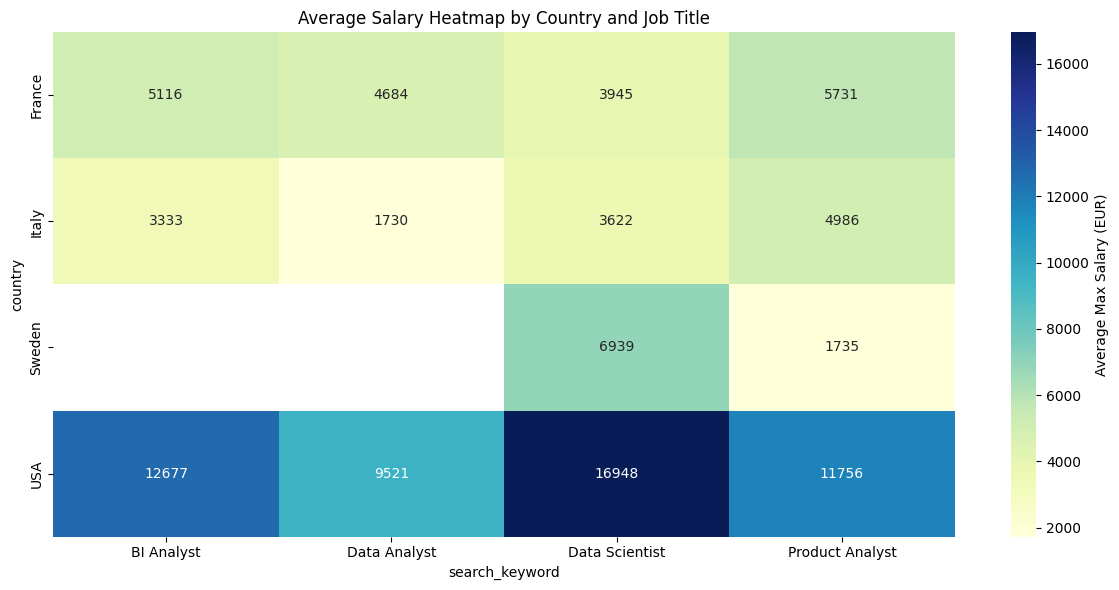

In [107]:
# Create pivot table with NA handling
pivot_table = df_combined.pivot_table(
    values='max_salary_month_EUR', 
    index='country', 
    columns='search_keyword', 
    aggfunc='mean', 
    observed=True
)

# Convert NA values to numbers that seaborn can handle
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.heatmap(
    pivot_table, 
    annot=True,  # Show values
    cmap='YlGnBu',  # Color scheme
    fmt='.0f',  # Round to 0 decimal places
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title')
plt.tight_layout()
plt.show()

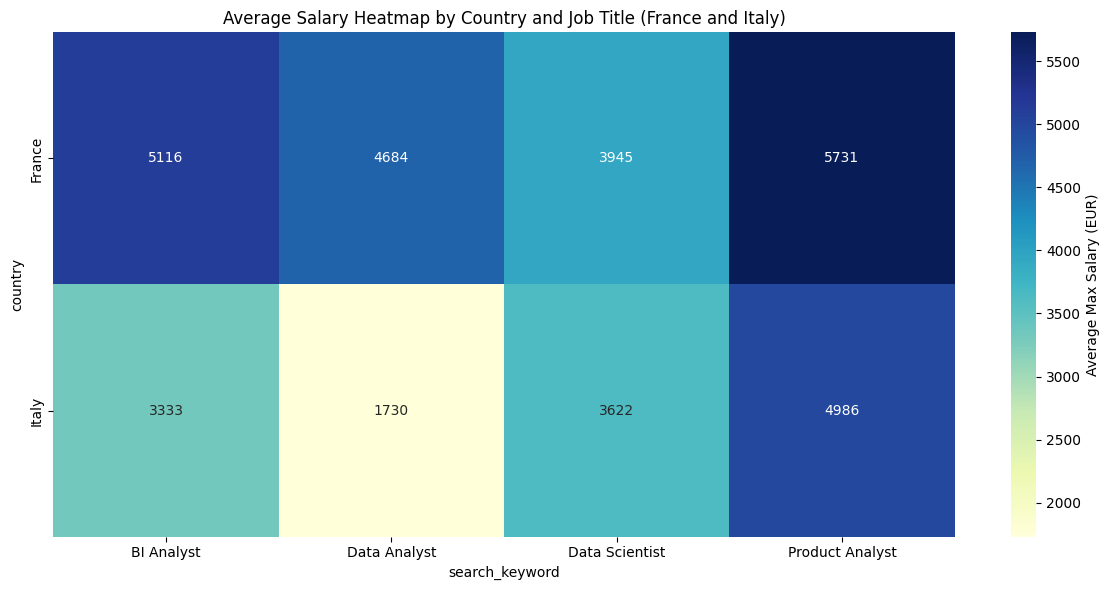

In [108]:
# Create pivot table excluding USA and Sweden
pivot_table = (df_combined[~df_combined['country'].isin(['USA', 'Sweden'])]
               .pivot_table(
                   values='max_salary_month_EUR', 
                   index='country', 
                   columns='search_keyword', 
                   aggfunc='mean', 
                   observed=True
               ))

# Convert NA values to numbers
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table, 
    annot=True, 
    cmap='YlGnBu',
    fmt='.0f',
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title (France and Italy)')
plt.tight_layout()
plt.show()

In [ ]:
# Make one for different salaries and regions in France, or different parts of Paris

## Conclusions 

### Categorical features: 
- Common keywords: 
- Technical skills required: 
- Interview process: 
- Locations: 
    
### Numerical features: 
- Salaries: 
- Salaries that stood out:
- Combinations that led to high salary: 
- Locations versus salaries: 

Salaries: 
- As expected, salaries are significantly higher in the US. For some reason, maximum salaries appear to be for Data Analyst jobs?
- If you want to be well paid in Europe, it seems like a good idea to become a Data Scientist in Sweden, or Product Analyst in France or Italy. There are tons of jobs that fell under the 'Product Analyst' title for France. Have to look into this. It would be worth looking into the job descriptions of these titles in France and Italy to understand this better. There are too few data points for Sweden. 

- Job titles appear to vary somewhat between countries (since top 3 ones were different for different countries). 
- Clean up job titles for different countries? The search algorithm actually is pretty bad? 

### Suggestions for future work
Analysis


In [ ]:
# Save CSV files

# Need to retrieve location data for Tableau?  